In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データの整理
- GDPデータ、金利（短長）、税データがある
- 税データのみ年次データであるので四半期に合わせるために調整したいので後に整理する
- まずはGDPデータ、金利（短長）を整理する
## GDPデータを統合

- GDPデータは1980-1995Q1と1994Q1-2025年の2つのデータがあり、若干データにズレがある
- 1994Q1-1995Q1のデータに被りがあるが、そこが合致しない。この理由は実質データであるため基準年がそれぞれ2015年と2020年としてあり異なっている
- ここで、2020基準に全データを統一させるため、被りがある5期分のデータで「2020年基準の合計/2015年基準の合計」を2020年基準修正係数として、2015年基準のデータに積を取るb

In [3]:
df = pd.read_csv("gdp_data_251214.csv", thousands=",")

df.head()

,date,def_2015,def_2020,gdp_2015,gdp_2020,cons_2015,cons_2020,民間住宅_15,民間住宅_20,民間企業設備_15,民間企業設備_20,政府最終消費支出_15,政府最終消費支出_20,公的固定資本形成_15,公的固定資本形成_20
0,1980-01-01,91.2,NaN,269747.5,NaN,153290.7,NaN,26716.2,NaN,38097.5,NaN,44078.7,NaN,29252.6,NaN
1,1980-04-01,93.4,NaN,268521.8,NaN,153551.9,NaN,26367.9,NaN,38403.6,NaN,44442.9,NaN,27925.8,NaN
2,1980-07-01,94.4,NaN,274183.1,NaN,155580.0,NaN,25824.5,NaN,38223.4,NaN,44895.0,NaN,28018.6,NaN
3,1980-10-01,95.4,NaN,279601.8,NaN,156162.4,NaN,25285.0,NaN,39227.7,NaN,45386.4,NaN,29858.2,NaN
4,1981-01-01,95.6,NaN,281995.7,NaN,156757.7,NaN,25392.5,NaN,39542.0,NaN,46006.4,NaN,30329.8,NaN


In [4]:
# 投資、政府支出に必要なデータを計算

df["inv_2015"] = df.民間住宅_15 + df.民間企業設備_15
df["inv_2020"] = df.民間住宅_20 + df.民間企業設備_20
df["gov_2015"] = df.政府最終消費支出_15 + df.公的固定資本形成_15
df["gov_2020"] = df.政府最終消費支出_20 + df.公的固定資本形成_20

In [5]:
# 被りデータの平均で基準を2020年基準データに合わせる
def union(df, old, new, name):

    overlap = df[[old, new]].dropna()
    raitio = overlap[new].mean()/overlap[old].mean()
    df[name] = df[new].fillna(df[old]*raitio)
union(df, "def_2015", "def_2020", "gdp_def")
union(df, "gdp_2015", "gdp_2020", "gdp")
union(df, "cons_2015", "cons_2020", "cons")
union(df, "inv_2015", "inv_2020", "inv")
union(df, "gov_2015", "gov_2020", "gov")

# data列を時間データにする
df = df.set_index('date')
df.index = pd.to_datetime(df.index)
df

,def_2015,def_2020,gdp_2015,gdp_2020,cons_2015,cons_2020,民間住宅_15,民間住宅_20,民間企業設備_15,民間企業設備_20,...,公的固定資本形成_20,inv_2015,inv_2020,gov_2015,gov_2020,gdp_def,gdp,cons,inv,gov
date,,,,,,,,,,,,,,,,,,,,,
1980-01-01,91.2,NaN,269747.5,NaN,153290.7,NaN,26716.2,NaN,38097.5,NaN,...,NaN,64813.7,NaN,73331.3,NaN,89.540658,280315.318775,156236.467458,72537.651350,72906.708609
1980-04-01,93.4,NaN,268521.8,NaN,153551.9,NaN,26367.9,NaN,38403.6,NaN,...,NaN,64771.5,NaN,72368.7,NaN,91.700630,279041.599885,156502.686905,72490.422309,71949.682105
1980-07-01,94.4,NaN,274183.1,NaN,155580.0,NaN,25824.5,NaN,38223.4,NaN,...,NaN,64047.9,NaN,72913.6,NaN,92.682435,284924.690977,158569.760639,71680.589750,72491.427110
1980-10-01,95.4,NaN,279601.8,NaN,156162.4,NaN,25285.0,NaN,39227.7,NaN,...,NaN,64512.7,NaN,75244.6,NaN,93.664241,290555.677799,159163.352544,72200.780702,74808.930520
1981-01-01,95.6,NaN,281995.7,NaN,156757.7,NaN,25392.5,NaN,39542.0,NaN,...,NaN,64934.5,NaN,76336.2,NaN,93.860602,293043.362918,159770.092347,72672.847277,75894.210109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,NaN,109.0,NaN,586251.3,NaN,305069.6,NaN,23062.7,NaN,104775.9,...,27851.1,NaN,127838.6,NaN,149358.6,109.000000,586251.300000,305069.600000,127838.600000,149358.600000
2024-10-01,NaN,109.9,NaN,588234.4,NaN,304995.1,NaN,23148.9,NaN,104588.1,...,27678.9,NaN,127737.0,NaN,149262.8,109.900000,588234.400000,304995.100000,127737.000000,149262.800000
2025-01-01,NaN,110.4,NaN,590458.0,NaN,307197.5,NaN,23137.8,NaN,104817.7,...,27654.2,NaN,127955.5,NaN,148875.2,110.400000,590458.000000,307197.500000,127955.500000,148875.200000


## 金利データの調整
### 長期金利データ
- 長期金利データは日時データであるため、それを四半期データに調整
- S61.12.1のようなデータなので、先頭の文字と"."で区切り、日時データに変換

In [6]:
# データの読み込み
df1 = pd.read_csv("longrate_data_251214.csv")
df1

,date,新発10年国債利回り
0,S61.12.1,5.430
1,S61.12.2,5.430
2,S61.12.3,5.396
3,S61.12.4,5.371
4,S61.12.5,5.337
...,...,...
9628,R7.11.21,1.792
9629,R7.11.25,1.811
9630,R7.11.26,1.825
9631,R7.11.27,1.807


In [7]:
# 関数はAIに書いてもらう
df1 = pd.read_csv("longrate_data_251214.csv")

def parse_japanese_date(date_str):
    """
    'S61.12.1' のような文字列を西暦のdatetime型に変換する関数
    対応: S(昭和), H(平成), R(令和)
    """
    if pd.isna(date_str):
        return None
    
    # 1文字目(元号)とそれ以降(年月日)に分ける
    # 例: 'S61.12.1' -> letter='S', rest='61.12.1'
    letter = date_str[0]
    try:
        parts = date_str[1:].split('.')
        year = int(parts[0])
        month = int(parts[1])
        # 日がない場合('S61.12')は1日とする
        day = int(parts[2]) if len(parts) > 2 else 1
    except:
        return None # エラー時はNoneを返す

    # 西暦への変換オフセット
    if letter == 'S':   # 昭和 (1926年 = 昭和1年 -> 1925 + 年)
        ad_year = 1925 + year
    elif letter == 'H': # 平成 (1989年 = 平成1年 -> 1988 + 年)
        ad_year = 1988 + year
    elif letter == 'R': # 令和 (2019年 = 令和1年 -> 2018 + 年)
        ad_year = 2018 + year
    elif letter == 'T': # 大正 (必要な場合)
        ad_year = 1911 + year
    elif letter == 'M': # 明治 (必要な場合)
        ad_year = 1867 + year
    else:
        # 西暦などで書かれていた場合そのまま返すなどの処理も可能
        return None

    return pd.Timestamp(f"{ad_year}-{month}-{day}")

# 関数の適用とそれを日付データにする
df1["date"] = df1['date'].apply(parse_japanese_date)
df1 = df1.set_index('date')
# 四半期データに書き換え
pd.DataFrame(df1['新発10年国債利回り'].resample('QS').mean()).head()

,新発10年国債利回り
date,
1986-10-01,5.381455
1987-01-01,5.010712
1987-04-01,4.027841
1987-07-01,5.459972
1987-10-01,5.505265


### 短期金利データ
- これは日時データなので、四半期データにする
- parse_datesで時間データにして、set_indexで時間をインデックスにする

In [8]:
df2 = pd.read_csv("shortrate_data_251214.csv", parse_dates=["date"]).set_index("date")
df2
# 四半期データに書き換え
pd.DataFrame(df2['無担保コールレート・Ｏ／Ｎ　月平均／金利'].resample('QS').mean()).head()

,無担保コールレート・Ｏ／Ｎ 月平均／金利
date,
1985-07-01,6.387167
1985-10-01,7.440333
1986-01-01,6.275433
1986-04-01,4.629300
1986-07-01,4.688467


### 実質金利・インフレ率の作成
- GDPデフレーター（物価）からインフレ率を作る
- それを金利データに演算

In [54]:
# AIに生成
# ---------------------------------------------------------
# 1. インフレ率 (Inflation Rate) の作成
# ---------------------------------------------------------
# pct_change(4): 4期間前（つまり1年前）との変化率を計算します
# * 100        : パーセント単位(%)にするため (例: 0.02 -> 2.0)

df['inflation'] = df['gdp_def'].pct_change(4) * 100

# フィッシャー方程式に基づき、実質金利を作成
df["実質長期金利"] = df1['新発10年国債利回り'].resample('QS').mean() - df['inflation']
df["実質短期金利"] = df2['無担保コールレート・Ｏ／Ｎ　月平均／金利'].resample('QS').mean() - df['inflation']

df.head()


,gdp_def,gdp,cons,inv,gov,inflation,long_rate,short_rate,t_total,t_income,t_corp,t_cons,t_other,dispo_income,dispo_corp,t_total_L1,long_rate_L1,gov_L1,実質長期金利,実質短期金利
date,,,,,,,,,,,,,,,,,,,,
1980-01-01,89.540658,280315.318775,156236.467458,72537.651350,72906.708609,NaN,NaN,NaN,28881.990257,11608.821490,9591.284076,0.0,7681.884690,251433.328518,270724.034699,NaN,NaN,NaN,NaN,NaN
1980-04-01,91.700630,279041.599885,156502.686905,72490.422309,71949.682105,NaN,NaN,NaN,28750.753988,11556.072410,9547.702442,0.0,7646.979135,250290.845898,269493.897443,28881.990257,NaN,72906.708609,NaN,NaN
1980-07-01,92.682435,284924.690977,158569.760639,71680.589750,72491.427110,NaN,NaN,NaN,29356.912011,11799.711447,9748.998604,0.0,7808.201960,255567.778966,275175.692372,28750.753988,NaN,71949.682105,NaN,NaN
1980-10-01,93.664241,290555.677799,159163.352544,72200.780702,74808.930520,NaN,NaN,NaN,29937.094740,12032.909979,9941.668753,0.0,7962.516007,260618.583059,280614.009046,29356.912011,NaN,72491.427110,NaN,NaN
1981-01-01,93.860602,293043.362918,159770.092347,72672.847277,75894.210109,4.824561,NaN,NaN,30308.714340,12541.767999,9235.897647,0.0,8531.048694,262734.648578,283807.465271,29937.094740,NaN,74808.930520,NaN,NaN


## ここまでのデータの統合
- これから頻繁に使うので、データフレーム名は"d"にする
- GDP、金利、税のデータを統合

In [55]:
d = pd.DataFrame()
d = df[["gdp_def", "gdp", "cons", "inv", "gov", "inflation"]].copy()


d["long_rate"] = df["実質長期金利"]
d["short_rate"] = df["実質短期金利"]
d.head()

,gdp_def,gdp,cons,inv,gov,inflation,long_rate,short_rate
date,,,,,,,,
1980-01-01,89.540658,280315.318775,156236.467458,72537.651350,72906.708609,NaN,NaN,NaN
1980-04-01,91.700630,279041.599885,156502.686905,72490.422309,71949.682105,NaN,NaN,NaN
1980-07-01,92.682435,284924.690977,158569.760639,71680.589750,72491.427110,NaN,NaN,NaN
1980-10-01,93.664241,290555.677799,159163.352544,72200.780702,74808.930520,NaN,NaN,NaN
1981-01-01,93.860602,293043.362918,159770.092347,72672.847277,75894.210109,4.824561,NaN,NaN


Text(0, 0.5, 'Level')

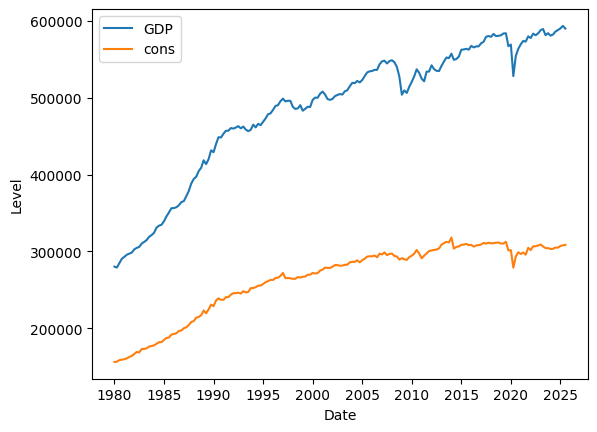

In [11]:
plt.plot(d.index, d["gdp"], label = "GDP")
plt.plot(d.index, d["cons"], label = "cons")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Level")

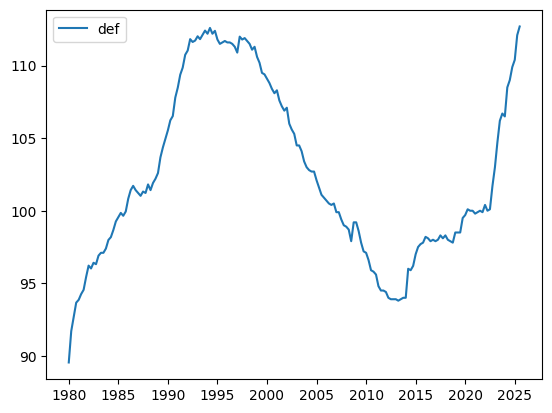

In [12]:
plt.plot(d.index, d["gdp_def"], label = "def")
plt.legend()

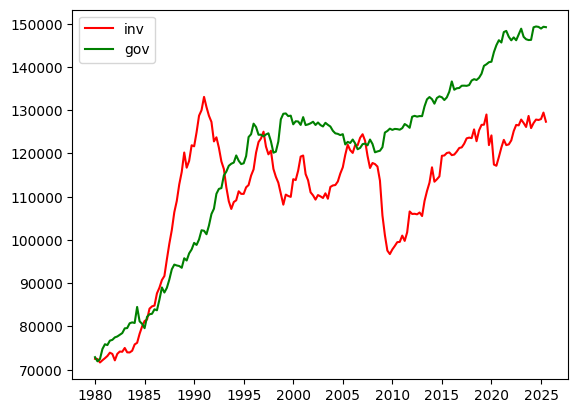

In [13]:
plt.plot(d.index, d["inv"], label="inv", color="red")
plt.plot(d.index, d["gov"], label="gov", color="green")
plt.legend()

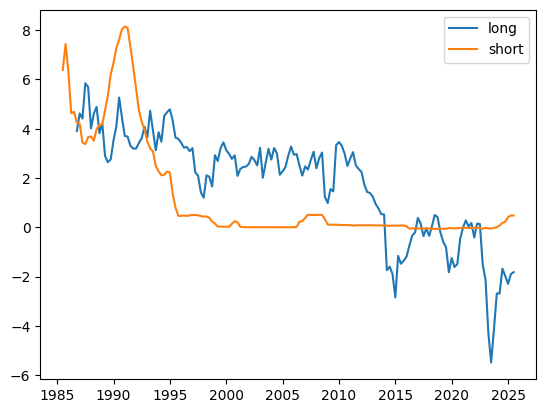

In [14]:
plt.plot(d.index, d["long_rate"], label="long")
plt.plot(d.index, d["short_rate"], label="short")
plt.legend()

## 税データを調整
- 年次データを調整する
- GDPデータを名目データに変換して、税との関連性をみることで税の動きをつけていく
- GDPデータの四半期データは1年分のものに換算されているので、税の動きも1年分のものにするために、4倍する。
- そのデータを実質データにする

In [15]:
df3 = pd.read_csv("tax_data_251215.csv", parse_dates=["Unnamed: 0"])
df3.rename(
    columns={"Unnamed: 0": "date"},
    inplace=True
)
df3 = df3.set_index("date")

# GDPデータの単位が10億に対して、税のデータの単位が1億なので、それを合わせるため10で割る
df3 = df3[['一般会計税収', '所得税収', '法人税収', '消費税収']]/10

# 消費税導入前のデータは0で補完
df3["消費税収"] = df3["消費税収"].fillna(0)
df3.head()

,一般会計税収,所得税収,法人税収,消費税収
date,,,,
1979-01-01,23729.5,9272.0,7385.9,0.0
1980-01-01,26868.7,10799.6,8922.7,0.0
1981-01-01,28952.1,11980.4,8822.5,0.0
1982-01-01,30511.1,12845.5,9134.6,0.0
1983-01-01,32358.3,13642.8,9824.5,0.0


In [16]:
# 名目データを生成
# df4は名目データのデータフレーム
df4 = pd.DataFrame()

df4["ngdp"] = d["gdp"] * d["gdp_def"] / 100
df4["ncons"] = d["cons"] * d["gdp_def"] / 100
df4["ninv"]  = d["inv"]  * d["gdp_def"] / 100
df4["ngov"]  = d["gov"]  * d["gdp_def"] / 100
df4.head()

,ngdp,ncons,ninv,ngov
date,,,,
1980-01-01,250996.180353,139895.160690,64950.690173,65281.146471
1980-04-01,255882.904530,143513.949563,66474.173810,65978.311637
1980-07-01,264075.142281,146966.315761,66435.316196,67186.820007
1980-10-01,272146.769502,149079.145677,67626.313045,70069.216768
1981-01-01,275052.264027,149961.170204,68211.171813,71234.762354


In [17]:
# 税の年次データを四半期データに変換する関数、これはAIに作ってもらう
import pandas as pd

def distribute_annual_to_quarterly(df_q, df_a, target_col, proxy_col, result_col):
    """
    年次データを代理変数の比率に応じて四半期配分する関数 (Pandas 2.2+ 対応版)
    """
    
    # 1. 代理変数(Proxy)の「その年の合計値」を計算する
    # 修正: 'A' -> 'YE' (Year End) に変更
    proxy_annual_sum = df_q[proxy_col].resample('YE').sum()
    
    # 2. 計算用の作業テーブルを作る
    df_calc = df_q[[proxy_col]].copy()
    df_calc['year'] = df_calc.index.year
    
    # 3. 「その年の合計値」を四半期データに紐付ける
    
    # (A) 代理変数の年合計を辞書にする
    proxy_map = proxy_annual_sum.set_axis(proxy_annual_sum.index.year).to_dict()
    df_calc['proxy_sum'] = df_calc['year'].map(proxy_map)
    
    # (B) 分解したい年次データ(税収)も辞書にする
    # 修正: 'A' -> 'YE' に変更
    df_a_yearly = df_a.resample('YE').last() 
    target_map = df_a_yearly[target_col].set_axis(df_a_yearly.index.year).to_dict()
    df_calc['annual_target'] = df_calc['year'].map(target_map)
    
    # 4. 按分計算
    # 四半期税収 = 年次税収総額 * (その期の代理変数 / その年の代理変数合計)
    df_calc[result_col] = df_calc['annual_target'] * (df_calc[proxy_col] / df_calc['proxy_sum'])*4
    
    return df_calc[result_col]

In [18]:
# 名目税データを作成
# 1. 所得税 (Income Tax) -> 名目GDPに合わせて分解
df4['nominal_income_tax'] = distribute_annual_to_quarterly(
    df_q=df4,
    df_a=df3,
    target_col='所得税収',    # 年次データの列名
    proxy_col='ngdp',           # 代理変数（GDP）
    result_col='nominal_income_tax'
)
# 2. 法人税 (Corporate Tax) -> 名目GDPに合わせて分解
df4['nominal_corp_tax'] = distribute_annual_to_quarterly(
    df_q=df4,
    df_a=df3,
    target_col='法人税収',
    proxy_col='ngdp',           # 代理変数（GDP）
    result_col='nominal_corp_tax'
)

# 3. 消費税 (Consumption Tax) -> ★名目消費★に合わせて分解
df4['nominal_cons_tax'] = distribute_annual_to_quarterly(
    df_q=df4,
    df_a=df3,
    target_col='消費税収',
    proxy_col='ncons',          # ★ここ重要：消費を使う
    result_col='nominal_cons_tax'
)



# 1. 一般会計税収 (General Account) を 名目GDP (ngdp) で分解
df4['nominal_tax_total'] = distribute_annual_to_quarterly(
    df_q=df4,
    df_a=df3,
    target_col='一般会計税収', # 年次データの合計欄
    proxy_col='ngdp',             # 合計はGDPに比例すると仮定
    result_col='nominal_tax_total'
)

# 2. 「その他の税 (residual_tax)」を逆算する
# これで酒税や相続税などを一括りにした変数が作れます
df4['nominal_tax_other'] = df4['nominal_tax_total'] - (
    df4['nominal_income_tax'] + 
    df4['nominal_corp_tax'] + 
    df4['nominal_cons_tax']
)
df4.head()

,ngdp,ncons,ninv,ngov,nominal_income_tax,nominal_corp_tax,nominal_cons_tax,nominal_tax_total,nominal_tax_other
date,,,,,,,,,
1980-01-01,250996.180353,139895.160690,64950.690173,65281.146471,10394.615125,8588.098854,0.0,25861.124062,6878.410083
1980-04-01,255882.904530,143513.949563,66474.173810,65978.311637,10596.991181,8755.303272,0.0,26364.622482,7012.328029
1980-07-01,264075.142281,146966.315761,66435.316196,67186.820007,10936.259924,9035.609321,0.0,27208.700972,7236.831727
1980-10-01,272146.769502,149079.145677,67626.313045,70069.216768,11270.533769,9311.788554,0.0,28040.352484,7458.030161
1981-01-01,275052.264027,149961.170204,68211.171813,71234.762354,11771.778923,8668.869115,0.0,28447.941683,8007.293646


,gdp_def,gdp,cons,inv,gov,inflation,long_rate,short_rate,t_total,t_income,t_corp,t_cons,t_other
date,,,,,,,,,,,,,
1980-01-01,89.540658,280315.318775,156236.467458,72537.651350,72906.708609,NaN,NaN,NaN,28881.990257,11608.821490,9591.284076,0.0,7681.884690
1980-04-01,91.700630,279041.599885,156502.686905,72490.422309,71949.682105,NaN,NaN,NaN,28750.753988,11556.072410,9547.702442,0.0,7646.979135
1980-07-01,92.682435,284924.690977,158569.760639,71680.589750,72491.427110,NaN,NaN,NaN,29356.912011,11799.711447,9748.998604,0.0,7808.201960
1980-10-01,93.664241,290555.677799,159163.352544,72200.780702,74808.930520,NaN,NaN,NaN,29937.094740,12032.909979,9941.668753,0.0,7962.516007
1981-01-01,93.860602,293043.362918,159770.092347,72672.847277,75894.210109,4.824561,NaN,NaN,30308.714340,12541.767999,9235.897647,0.0,8531.048694


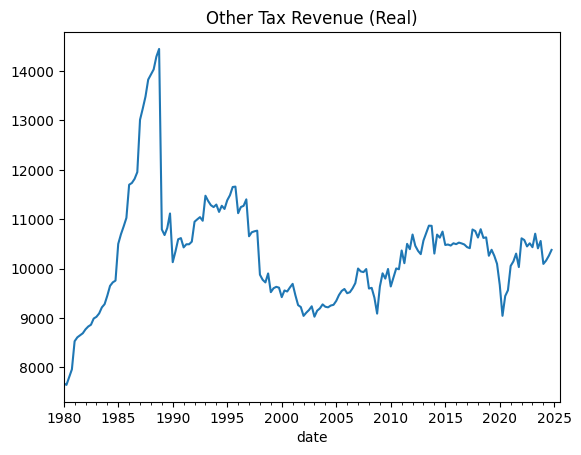

In [19]:
# 実質化

d['t_total'] = df4['nominal_tax_total'] / d['gdp_def'] * 100
d['t_income'] = df4['nominal_income_tax'] / d['gdp_def'] * 100
d['t_corp'] = df4['nominal_corp_tax'] / d['gdp_def'] * 100
d["t_cons"] = df4["nominal_cons_tax"] / d["gdp_def"] * 100
d['t_other'] = df4['nominal_tax_other'] / d['gdp_def'] * 100

# 確認：その他の税がマイナスになっていないかチェック
d['t_other'].plot(title="Other Tax Revenue (Real)")
d.head()

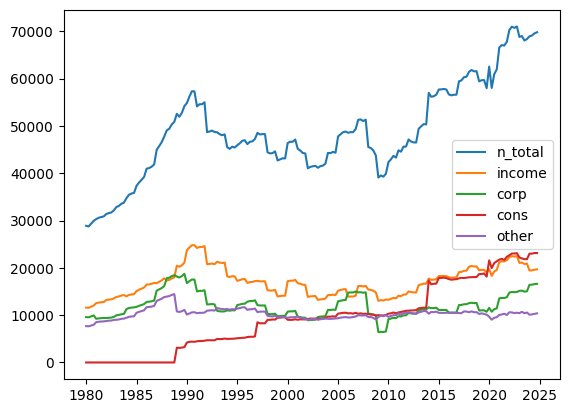

In [20]:
plt.plot(d.index, d.t_total, label="n_total")
plt.plot(d.index, d.t_income, label="income")
plt.plot(d.index, d.t_corp, label="corp")
plt.plot(d.index, d.t_cons, label="cons")
plt.plot(d.index, d.t_other, label="other")
plt.legend()

# データの分析
## 概要
- 構造方程式は以下のもので考えていく
    - Y = C + I + G
    - C = c0 + c1 * (Y - T) + [他要素] + [ラグ]
    - I = i0 + i1 * r + [他要素] + [ラグ]
    - G = [税のラグ]
- 以下はラグをAICで判断していく

In [21]:
d["dispo_income"] = d["gdp"] - d["t_total"]
d["dispo_corp"] = d["gdp"] - d["t_corp"]
d.columns

Index(['gdp_def', 'gdp', 'cons', 'inv', 'gov', 'inflation', 'long_rate',
       'short_rate', 't_total', 't_income', 't_corp', 't_cons', 't_other',
       'dispo_income', 'dispo_corp'],
      dtype='object')

In [22]:
#d.to_csv('d_data.csv', index=True)

In [23]:
d.describe()

,gdp_def,gdp,cons,inv,gov,inflation,long_rate,short_rate,t_total,t_income,t_corp,t_cons,t_other,dispo_income,dispo_corp
count,183.000000,183.000000,183.000000,183.000000,183.000000,179.000000,156.000000,161.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,102.402100,486202.089559,264308.509429,110464.394717,118564.576661,0.441495,1.742113,1.253027,48792.342119,17071.743026,12036.080100,9403.910931,10280.608062,435656.471156,472412.733174
std,6.012643,86847.784705,46622.331955,16279.318450,21384.708295,1.615078,2.210642,2.195921,9997.365574,3111.768315,2578.166542,7069.747431,1118.850676,79144.631706,86371.318476
min,89.540658,279041.599885,156236.467458,71680.589750,71949.682105,-2.427638,-5.487245,-0.066000,28750.753988,11556.072410,6414.636363,0.000000,7646.979135,250290.845898,269493.897443
25%,97.900000,456882.456570,240579.313417,106035.200000,102800.464460,-0.819160,0.141920,0.001000,43143.769307,14263.368398,10204.387217,4523.751956,9561.751455,401716.910508,441071.906976
50%,100.831421,504886.500000,281692.000000,114891.100000,124652.700000,0.157107,2.466901,0.089667,47185.274447,16905.850866,11270.294422,9309.130661,10326.074520,462651.938574,494733.210068
75%,108.200000,551103.700000,301860.900000,121924.500000,132534.150000,1.605893,3.227582,0.800000,56211.479294,19408.487130,13177.478300,11567.278756,10739.087005,496985.322585,538134.182715
max,112.700000,593596.900000,318136.900000,133082.595747,149358.600000,6.093906,5.846072,8.150827,71015.277185,24795.884215,18737.396291,23131.553415,14445.801860,524350.732468,574410.869565


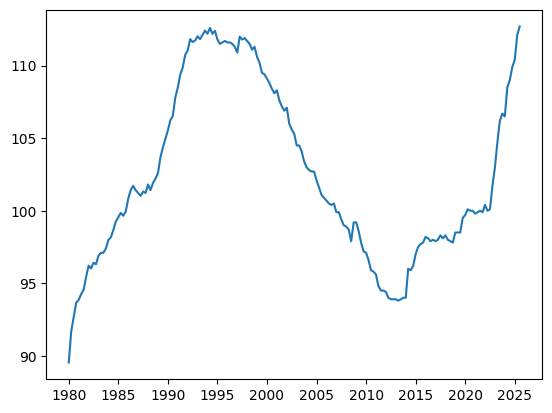

In [53]:
d["gdp_def"].describe()
plt.plot(d.index, d["gdp_def"])

## 消費関数
**C = c0 + c1 * (Y - T) + [ラグ]**
- ラグをAICで判断していく
- まずはラグなしの消費関数を推定
- 結果としては悪くない

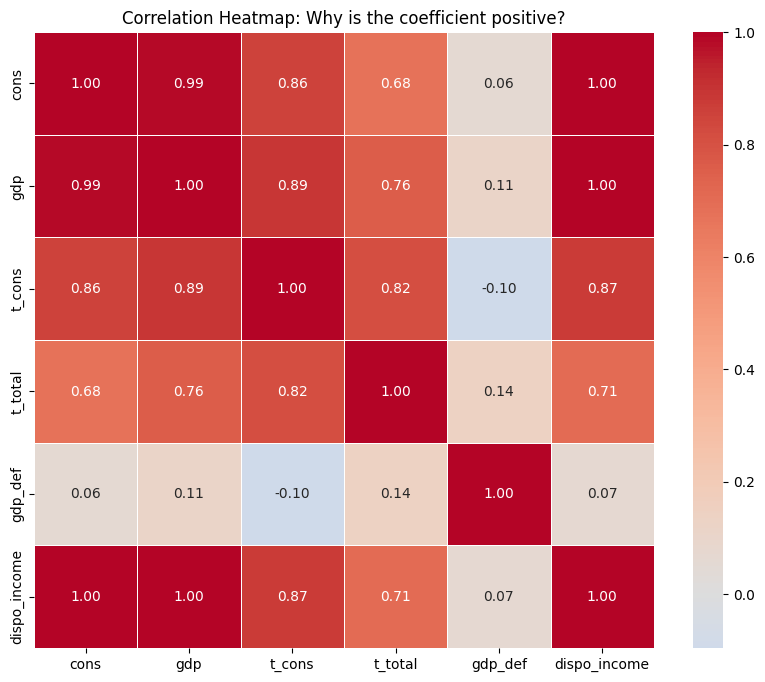

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 見たい変数だけを選抜
# 全部やると文字が小さくなるので、投資関数に関係ありそうなものをピックアップします
target_cols = [
    'cons',          # 消費 (主役)
    'gdp',          # GDP
    't_cons',       # 消費税収
    't_total',    # 一般会計税収
    'gdp_def',      # デフレーター (物価)
    'dispo_income'           # 政府支出 (参考)
]

# 2. 相関行列の計算
corr_matrix = d[target_cols].corr()

# 3. ヒートマップの描画
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,       # 数字を表示する
            cmap='coolwarm',  # 赤がプラス、青がマイナス
            center=0,         # 0を白にする
            fmt='.2f',        # 小数点2桁まで
            linewidths=0.5)

plt.title("Correlation Heatmap: Why is the coefficient positive?")
plt.show()

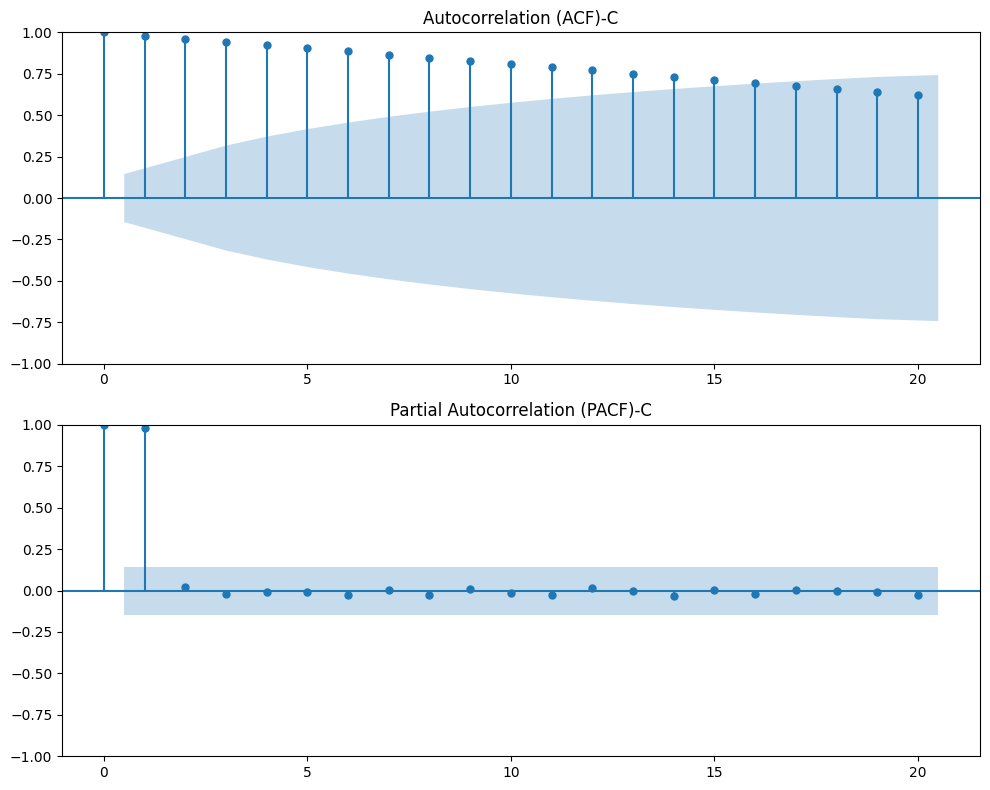

In [26]:
# AIより
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# データ準備
df_ts = d.copy()
# 欠損除去
df_ts = df_ts.dropna(subset=["cons"])

# ---------------------------------------------------------
# 1. ACF (自己相関) と PACF (偏自己相関) のプロット
# ---------------------------------------------------------
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# ACF: 単純な相関 (過去の影響をすべて含む)
plot_acf(df_ts["cons"], lags=20, ax=ax[0], title="Autocorrelation (ACF)-C")

# PACF: 真の相関 (中間の影響を取り除いたもの)
# ★ここが重要！棒グラフが青い帯(信頼区間)から飛び出している本数が「必要なラグ数」です
plot_pacf(df_ts['cons'], lags=20, ax=ax[1], title="Partial Autocorrelation (PACF)-C")

plt.tight_layout()
plt.show()

In [27]:
# AIメインで関数を書かせる
import statsmodels.api as sm
import pandas as pd

# d というデータフレームを使っていると仮定します
# 念のためコピーして分析用データを作ります
df_reg = d.copy()

# ---------------------------------------------------------
# 1. 変数の作成
# ---------------------------------------------------------
# 可処分所得 (Disposable Income) = GDP - 税収総額
# モデル: C = c0 + c1 * (Y - T)
df_reg['disp_income'] = df_reg['gdp'] - df_reg['t_total']

# ---------------------------------------------------------
# 2. モデルの定義
# ---------------------------------------------------------
# 被説明変数 (Y側): 消費
y = df_reg['cons']

# 説明変数 (X側): 可処分所得
X = df_reg[['disp_income']]

# 定数項 (c0) を追加
# これを忘れると「基礎消費なし（所得ゼロなら餓死）」というモデルになってしまいます
X = sm.add_constant(X)

# ---------------------------------------------------------
# 3. 推定の実行 (OLS: 最小二乗法)
# ---------------------------------------------------------
# missing='drop' で、税データなどの欠損がある期間を自動的に除外して計算します
model = sm.OLS(y, X, missing='drop')
results = model.fit()

# ---------------------------------------------------------
# 4. 結果の表示
# ---------------------------------------------------------
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.369e+04
Date:                Sun, 28 Dec 2025   Prob (F-statistic):          2.79e-191
Time:                        20:38:44   Log-Likelihood:                -1749.2
No. Observations:                 180   AIC:                             3502.
Df Residuals:                     178   BIC:                             3509.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7669.7783   1689.858      4.539      

- ラグを見る関数を作る、そしてその関数を10ラグ分回してみたりする
- ラグを付けるだけAICがよくなるので、回帰係数のp値に注目するとラグ2つがいいかんじに

In [28]:
df_reg = d.copy()
df_reg['disp_income'] = df_reg['gdp'] - df_reg['t_total']

def C_cal_AIC(n, mode):
    feature = ['disp_income']
    for i in range(1, n+1):
        df_reg["cons_lag" + str(i)] = df_reg["cons"].shift(i)
        feature.append("cons_lag" + str(i))

    y = df_reg['cons']    
    X = df_reg[feature]
    
    X = sm.add_constant(X)
    
    model = sm.OLS(y, X, missing='drop')
    results = model.fit()
    
    #結果を見たいときに実行
    #print(results.summary())
    # --- モードによる出力の切り替え ---
    if mode == 'full':
        # 全部見たいとき
        print(results.summary())
        
    elif mode == 'coef':
        # 係数の表（2段目）だけ見たいとき
        print(results.summary().tables[1])
        print(f"AIC: {results.aic:.2f}")

    elif mode == 'simple':
        # AICだけサクッと見たいとき（デフォルト）
        print(f"ラグ{n} の結果 (AIC: {results.aic:.2f})")
        
    elif mode == 'params':
        # 【重要】ゲーム用に係数の数値だけ欲しいとき
        return results.params

    

for i in range(10):
    C_cal_AIC(i, "simple")
C_cal_AIC(2, 'coef')
C_cal_AIC(3, 'coef')
C_cal_AIC(4, 'coef')

ラグ0 の結果 (AIC: 3502.38)
ラグ1 の結果 (AIC: 3359.21)
ラグ2 の結果 (AIC: 3335.28)
ラグ3 の結果 (AIC: 3318.97)
ラグ4 の結果 (AIC: 3302.72)
ラグ5 の結果 (AIC: 3285.76)
ラグ6 の結果 (AIC: 3267.28)
ラグ7 の結果 (AIC: 3251.54)
ラグ8 の結果 (AIC: 3234.57)
ラグ9 の結果 (AIC: 3218.44)
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5954.7382   1244.504      4.785      0.000    3498.471    8411.005
disp_income     0.1988      0.028      7.095      0.000       0.143       0.254
cons_lag1       0.4664      0.070      6.638      0.000       0.328       0.605
cons_lag2       0.1851      0.065      2.858      0.005       0.057       0.313
AIC: 3335.28
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5700.1624   1318.203      4.324      0.000    3098.224    8302.101
disp_income     0.2002      0.028    

### ラグは2つで決定
**Ct = 5954.74 + 0.20 * (Y-T) + 0.47 * Ct-1 + 0.19 * Ct-2  　：単位(10億)**

In [29]:
C_cal_AIC(2, "full")
print("-"*60)
print(C_cal_AIC(2, "params"))

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.548e+04
Date:                Sun, 28 Dec 2025   Prob (F-statistic):          6.00e-211
Time:                        20:38:44   Log-Likelihood:                -1663.6
No. Observations:                 178   AIC:                             3335.
Df Residuals:                     174   BIC:                             3348.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5954.7382   1244.504      4.785      

## 投資関数
- 後々わかるが、かなり自己相関が大きい
- ヒートマップで相関を見る
- PACFで自己相関を見る
1. 自己相関が高い → 金利、法人税の影響が皆無
2. ARモデルを検討 → 単位根の可能性が高い
3. 階差モデルで定常にさせる → 変化量の回帰になるので数値を当てに行けない
4. ECMという手法を選択（AIに聞きまくった）
- 最終モデル案（これが一番AICが低い）
    - I = i0 + i1 * (Y - T) + i2 * r・・・（長期モデル）
    - ΔI = i3 + i4 * Δ(Y - T) + i5 * (It-1 - I*t-1) + i6 * ΔIt-1・・・（短期モデル）
    - つまり：It = It-1 + i3 + i4 * (Yt - Yt-1 - Tt + Tt-1)) + i5 * (It-1 - I*t-1) + i6 * (It-1 - It-2)
    - I = It-1 + [定数項i3] + i4[キャッシュフロー変化] + i5[誤差修正(ECM)] + i6[慣性]
### データの概観を見る

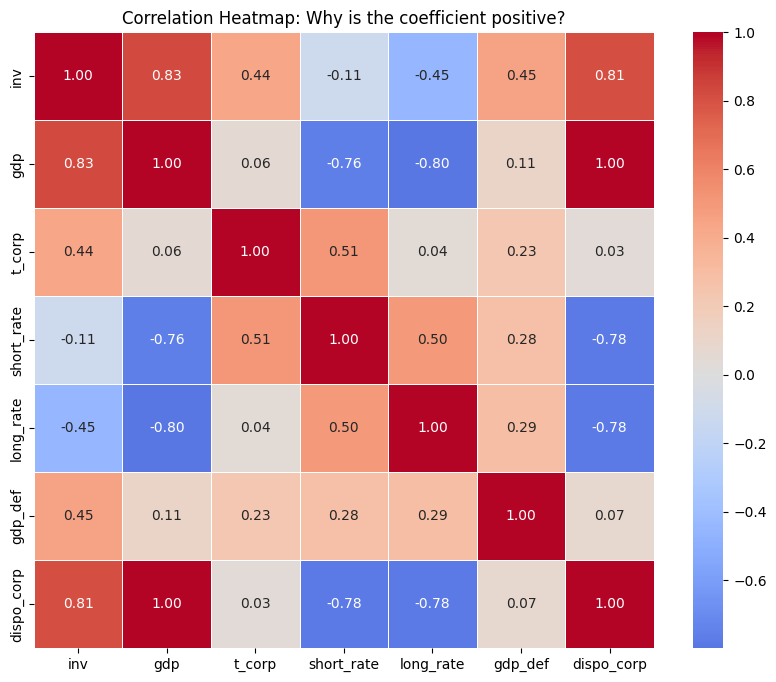

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 見たい変数だけを選抜
# 全部やると文字が小さくなるので、投資関数に関係ありそうなものをピックアップします
target_cols = [
    'inv',          # 設備投資 (主役)
    'gdp',          # GDP
    't_corp',       # 法人税
    'short_rate',    # 短期金利
    'long_rate',    # 長期金利
    'gdp_def',      # デフレーター (物価)
    'dispo_corp'           # 可処分所得的なやつ
]

# 2. 相関行列の計算
corr_matrix = d[target_cols].corr()

# 3. ヒートマップの描画
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,       # 数字を表示する
            cmap='coolwarm',  # 赤がプラス、青がマイナス
            center=0,         # 0を白にする
            fmt='.2f',        # 小数点2桁まで
            linewidths=0.5)

plt.title("Correlation Heatmap: Why is the coefficient positive?")
plt.show()

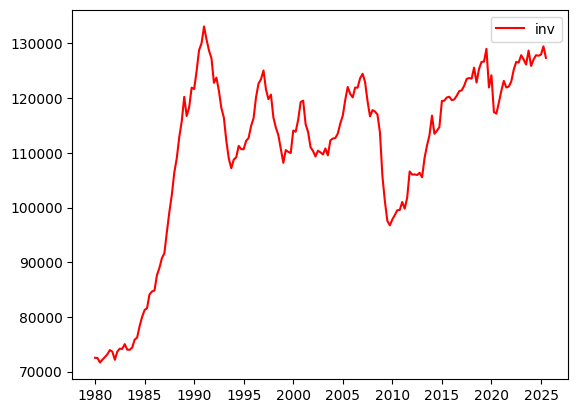

In [31]:
plt.plot(d.index, d["inv"], label="inv", color="red")
plt.legend()

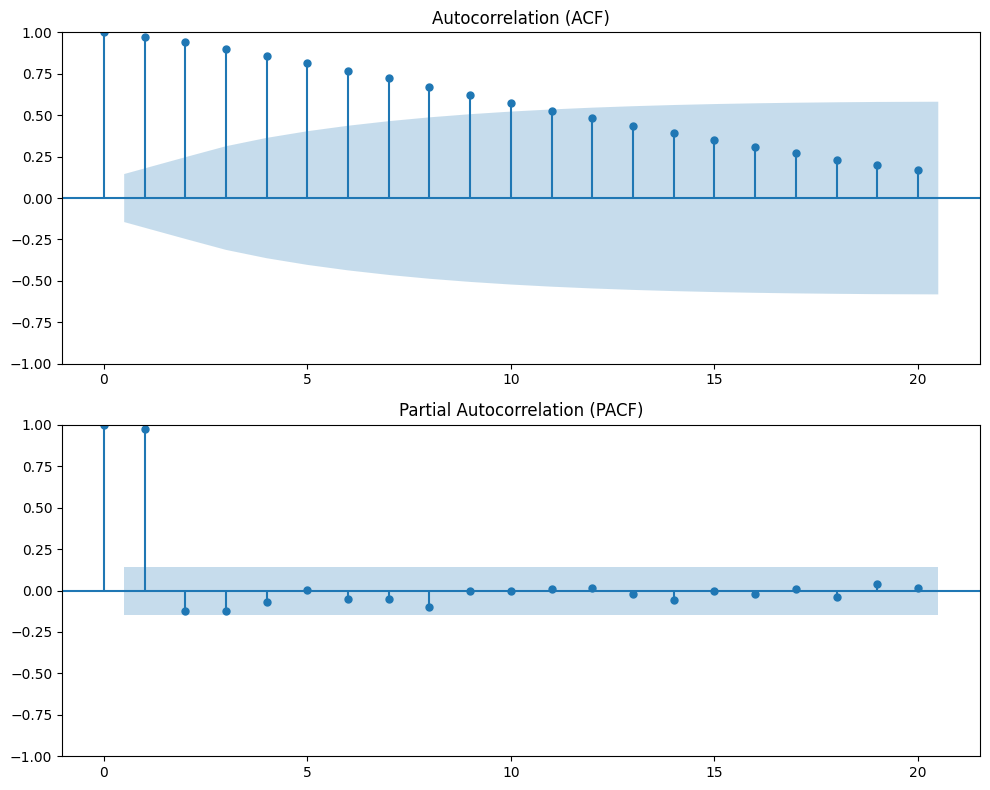

In [32]:
# AIより
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# データ準備
df_ts = d.copy()
# 欠損除去
df_ts = df_ts.dropna(subset=['inv'])

# ---------------------------------------------------------
# 1. ACF (自己相関) と PACF (偏自己相関) のプロット
# ---------------------------------------------------------
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# ACF: 単純な相関 (過去の影響をすべて含む)
plot_acf(df_ts['inv'], lags=20, ax=ax[0], title="Autocorrelation (ACF)")

# PACF: 真の相関 (中間の影響を取り除いたもの)
# ★ここが重要！棒グラフが青い帯(信頼区間)から飛び出している本数が「必要なラグ数」です
plot_pacf(df_ts['inv'], lags=20, ax=ax[1], title="Partial Autocorrelation (PACF)")

plt.tight_layout()
plt.show()

### 自己相関との戦い
- I = i0 + i1 * rを推定するも、決定係数とDW値が小さい
- DW値が小さいことで自己相関が大きい→ARモデルを疑う
- ラグを入れた途端、決定係数が大きくなり、DWが小さくなるが、金利のp値が大きくなる
- 結論：投資関数は自己相関にひどく影響を受ける。過去の投資で9割説明されてしまう。

In [33]:
def cal_inv_model(n, mode='simple'):
    df_calc = d.copy()
    features = ['long_rate']
    
    lag_cols = []
    for i in range(1, n + 1):
        col_name = f'inv_lag{i}'
        df_calc[col_name] = df_calc['inv'].shift(i)
        lag_cols.append(col_name)
    
    # 説明変数リストを結合 (金利 + ラグ変数たち)
    features.extend(lag_cols)
    
    # ラグを作ると先頭がNaNになるので、使っている変数の行だけ削除
    df_calc = df_calc.dropna(subset=['inv'] + features)
    
    y = df_calc['inv']
    X = df_calc[features]
    X = sm.add_constant(X)
    
    model = sm.OLS(y, X)
    results = model.fit()
    
    if mode == 'simple':
        print(results.aic)
        
    elif mode == 'full':
        print(f"=== Model with Lag {n} ===")
        print(results.summary())

    elif mode == 'coef':
        print(f"=== Model with Lag {n} (Coefficients) ===")
        print(results.summary().tables[1])


    return results

In [34]:
# I = i0 + i1 * r
cal_inv_model(0, "full")

=== Model with Lag 0 ===
                            OLS Regression Results                            
Dep. Variable:                    inv   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     39.48
Date:                Sun, 28 Dec 2025   Prob (F-statistic):           3.24e-09
Time:                        20:38:44   Log-Likelihood:                -1619.5
No. Observations:                 156   AIC:                             3243.
Df Residuals:                     154   BIC:                             3249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.194e+05    80

In [35]:
# I = i0 + i1 * r + i2 * It-1 + i3 * It-2
cal_inv_model(2, "full")

=== Model with Lag 2 ===
                            OLS Regression Results                            
Dep. Variable:                    inv   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     753.5
Date:                Sun, 28 Dec 2025   Prob (F-statistic):           5.43e-91
Time:                        20:38:44   Log-Likelihood:                -1421.7
No. Observations:                 156   AIC:                             2851.
Df Residuals:                     152   BIC:                             2864.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7496.2162   270

### 自己相関との戦い2
- 相関の高かった法人税可処分所得を変数に入れても、ラグがつくだけでp値が大きくなってしまう。

In [36]:
def cal_inv_model2(n, mode='simple'):
    df_calc = d.copy()
    features = ['long_rate', "dispo_corp"]
    
    lag_cols = []
    for i in range(1, n + 1):
        col_name = f'inv_lag{i}'
        df_calc[col_name] = df_calc['inv'].shift(i)
        lag_cols.append(col_name)
    
    # 説明変数リストを結合 (金利 + ラグ変数たち)
    features.extend(lag_cols)
    
    # ラグを作ると先頭がNaNになるので、使っている変数の行だけ削除
    df_calc = df_calc.dropna(subset=['inv'] + features)
    
    y = df_calc['inv']
    X = df_calc[features]
    X = sm.add_constant(X)
    
    model = sm.OLS(y, X)
    results = model.fit()
    
    if mode == 'simple':
        print(results.aic)
        
    elif mode == 'full':
        print(f"=== Model with Lag {n} ===")
        print(results.summary())

    elif mode == 'coef':
        print(f"=== Model with Lag {n} (Coefficients) ===")
        print(results.summary().tables[1])


    return results
cal_inv_model2(2, mode='full')

=== Model with Lag 2 ===
                            OLS Regression Results                            
Dep. Variable:                    inv   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     535.1
Date:                Sun, 28 Dec 2025   Prob (F-statistic):           6.89e-87
Time:                        20:38:44   Log-Likelihood:                -1394.9
No. Observations:                 153   AIC:                             2800.
Df Residuals:                     148   BIC:                             2815.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6559.7211   378

### 自己相関との戦い3
- 非定常性かもしれないので、検定してみる
- ARモデルで検証
- 差分を取って回帰すれば、今度こそ影響が取り除けるのではないか

In [37]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# --- サンプルデータの準備（実際にはあなたのデータフレームを使用してください） ---
# 投資(inv)とGDP(gdp)は強いトレンド、金利(long_rate)はやや変動すると仮定
T = 183 
time = np.arange(T)
np.random.seed(42)

inv_data = 100 + 5 * time + np.random.normal(0, 10, T).cumsum() # 非定常系列の典型
gdp_data = 500 + 8 * time + np.random.normal(0, 15, T).cumsum() # 非定常系列の典型
long_rate_data = 5 + np.random.normal(0, 1, T).cumsum() / 5 # やや非定常だがinv, gdpよりは定常に近いと仮定

df = pd.DataFrame({
    'inv': inv_data, 
    'gdp': gdp_data, 
    'long_rate': long_rate_data
})
# --------------------------------------------------------------------------------

def run_adf_test(series, name):
    """ADF検定を実行し、結果を出力する関数"""
    result = adfuller(series.dropna())
    print(f"--- ADF Test for: {name} ---")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"P-Value: {result[1]:.4f}")
    if result[1] < 0.05:
        print("Conclusion: P-Value < 0.05. H0 (Unit Root) is Rejected. -> SERIES IS LIKELY STATIONARY.")
    else:
        print("Conclusion: P-Value >= 0.05. H0 (Unit Root) is NOT Rejected. -> SERIES IS LIKELY NON-STATIONARY.")
    print("-" * 30)

# 主要な変数の定常性を確認
run_adf_test(df['inv'], 'inv (Investment)')
run_adf_test(df['gdp'], 'gdp (GDP)')
run_adf_test(df['long_rate'], 'long_rate (Long-Term Rate)')

# --------------------------------------------------------------------------------
# もし非定常な場合、差分（階差）を取って再検定
print("\n--- Testing First Difference (Delta) ---")
run_adf_test(df['inv'].diff(), 'Delta inv (Investment)')
run_adf_test(df['gdp'].diff(), 'Delta gdp (GDP)')
# --------------------------------------------------------------------------------

--- ADF Test for: inv (Investment) ---
ADF Statistic: 2.1859
P-Value: 0.9989
Conclusion: P-Value >= 0.05. H0 (Unit Root) is NOT Rejected. -> SERIES IS LIKELY NON-STATIONARY.
------------------------------
--- ADF Test for: gdp (GDP) ---
ADF Statistic: -0.2215
P-Value: 0.9359
Conclusion: P-Value >= 0.05. H0 (Unit Root) is NOT Rejected. -> SERIES IS LIKELY NON-STATIONARY.
------------------------------
--- ADF Test for: long_rate (Long-Term Rate) ---
ADF Statistic: -0.0993
P-Value: 0.9495
Conclusion: P-Value >= 0.05. H0 (Unit Root) is NOT Rejected. -> SERIES IS LIKELY NON-STATIONARY.
------------------------------

--- Testing First Difference (Delta) ---
--- ADF Test for: Delta inv (Investment) ---
ADF Statistic: -14.1003
P-Value: 0.0000
Conclusion: P-Value < 0.05. H0 (Unit Root) is Rejected. -> SERIES IS LIKELY STATIONARY.
------------------------------
--- ADF Test for: Delta gdp (GDP) ---
ADF Statistic: -14.3358
P-Value: 0.0000
Conclusion: P-Value < 0.05. H0 (Unit Root) is Rejected. 

In [38]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

def run_final_investment_regression(df):
    print("--- 最終投資関数モデル (差分モデル) の推定 ---")
    
    df_reg = df.copy()

    # ---------------------------------------------------------
    # 1. 実質変数の作成
    # ---------------------------------------------------------
    # インフレ率    
    # 実質金利 = 名目金利 - インフレ率
    df_reg['real_rate'] = df_reg['long_rate']
    
    # 実質キャッシュフロー = (名目GDP - 法人税) / デフレーター
    # 企業・経済全体が自由に使えるお金の代理変数
    df_reg['real_cashflow'] = df_reg['dispo_corp']
    
    # 実質設備投資
    df_reg['real_inv'] = df_reg['inv'] # もしinvが名目ならデフレーターで割ってください

    # ---------------------------------------------------------
    # 2. 差分（変化量）の作成
    # ---------------------------------------------------------
    # 今期 - 前期
    df_reg['inv_diff'] = df_reg['real_inv'].diff()
    df_reg['rate_diff'] = df_reg['real_rate'].diff()
    df_reg['cf_diff'] = df_reg['real_cashflow'].diff()

    # ---------------------------------------------------------
    # 3. モデル推定: ΔI = α + β1*Δr + β2*ΔCF
    # ---------------------------------------------------------
    # 欠損除去
    df_run = df_reg.dropna(subset=['inv_diff', 'rate_diff', 'cf_diff'])
    
    y = df_run['inv_diff']
    X = df_run[['rate_diff', 'cf_diff']]
    X = sm.add_constant(X) # 定数項 (トレンド成分)

    model = sm.OLS(y, X)
    results = model.fit()

    # ---------------------------------------------------------
    # 4. 結果表示
    # ---------------------------------------------------------
    print(results.summary())
    
    print("\n--- 【ゲーム実装用パラメータ】 ---")
    print(f"Intercept (定数項): {results.params['const']:.4f}")
    print(f"Beta_Rate (金利感応度): {results.params['rate_diff']:.4f}")
    print(f"Beta_CF   (所得感応度): {results.params['cf_diff']:.4f}")

    if results.params['rate_diff'] < 0:
        print("✅ 金利係数はマイナスです。利上げで投資が減ります。")
    else:
        print("⚠️ 金利係数がプラスです。手動修正が必要かもしれません。")

    return results

# 実行
final_results = run_final_investment_regression(d)

--- 最終投資関数モデル (差分モデル) の推定 ---
                            OLS Regression Results                            
Dep. Variable:               inv_diff   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     45.23
Date:                Sun, 28 Dec 2025   Prob (F-statistic):           4.47e-16
Time:                        20:38:44   Log-Likelihood:                -1360.5
No. Observations:                 152   AIC:                             2727.
Df Residuals:                     149   BIC:                             2736.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -101.7977 

### ECM誤差項を導入
- ECM誤差項を導入することで変化率しかわからない問題を解消できる？？
- 2つモデルを検証して比較
    1.  I = i0 + i1 * r + i2 * (Y-Tcorp) + ECM
    2.  I = i0 + i1 * r + i2 * Y + i3 * Tcorp + ECM
    3.  I = i0 + i1 * r + i2 * Tcorp + ECM

In [39]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

def run_ecm_analysis(df_input):
    print("=== ECM (誤差修正モデル) 推定プロセス ===\n")
    
    # データをコピー
    df = df_input.copy()
    
    # 1. 変数作成 (実質化・対数化など必要に応じて)
    # ここではシンプルにそのまま使います
    # inv: 投資, gdp: GDP, rate: 金利
    
    # 欠損値除去
    df = df.dropna(subset=['inv', 'dispo_corp', 'long_rate'])

    # =================================================================
    # 【Step 0】 単位根検定 (ADF Test) - 前提確認
    # =================================================================
    print("--- [Step 0] 単位根検定 (変数が非定常か確認) ---")
    for col in ['inv', 'dispo_corp', 'long_rate']:
        p_val = adfuller(df[col])[1]
        judge = "非定常 (OK)" if p_val > 0.05 else "定常 (本来はNG)"
        print(f"{col}: p値 = {p_val:.4f} -> {judge}")
    print("")

    # =================================================================
    # 【Step 1】 長期均衡式の推定 (Cointegration Regression)
    # モデル: I_t = β0 + β1*Y_t + β2*r_t + μ_t
    # =================================================================
    print("--- [Step 1] 長期均衡式の推定 (水準OLS) ---")
    
    y_long = df['inv']
    X_long = df[['dispo_corp', 'long_rate']]
    X_long = sm.add_constant(X_long)
    
    model_long = sm.OLS(y_long, X_long)
    results_long = model_long.fit()
    
    print(results_long.summary().tables[1])
    
    # ★重要: 残差 (μ_t) を保存する
    df['ecm_term'] = results_long.resid

    # =================================================================
    # 【Step 2】 共和分検定 (残差の定常性チェック)
    # =================================================================
    print("\n--- [Step 2] 残差のADF検定 (共和分の確認) ---")
    # 残差が「定常」なら、変数間に共和分関係があると言える
    adf_resid = adfuller(df['ecm_term'])
    p_val_resid = adf_resid[1]
    
    print(f"残差のADF統計量: {adf_resid[0]:.4f}")
    print(f"p値: {p_val_resid:.4f}")
    
    if p_val_resid < 0.1: # 10%有意水準くらいで判定
        print("✅ 成功: 残差は定常です。ECM推定に進めます。")
    else:
        print("⚠️ 警告: 残差が非定常です。本来はECMを適用できません。")
        print("   (ただしゲーム制作なので、理論的関係を仮定して進めましょう)")

    # =================================================================
    # 【Step 3】 短期動学モデルの推定 (Error Correction Model)
    # モデル: ΔI_t = γ0 + γ1*ΔY_t + γ2*Δr_t + δ*ECM_{t-1} + ε_t
    # =================================================================
    print("\n--- [Step 3] 短期モデルの推定 (差分+ECM項) ---")
    
    # 差分データの作成
    df['d_inv'] = df['inv'].diff()
    df['d_dispo_corp'] = df['dispo_corp'].diff()
    df['d_rate'] = df['long_rate'].diff()
    
    # ECM項のラグ (t-1) を作成
    df['ecm_lag1'] = df['ecm_term'].shift(1)
    
    # 分析用データの整形
    df_short = df.dropna(subset=['d_inv', 'd_dispo_corp', 'd_rate', 'ecm_lag1'])
    
    y_short = df_short['d_inv']
    # 説明変数: ΔGDP, Δ金利, ECMラグ
    X_short = df_short[['d_dispo_corp', 'd_rate', 'ecm_lag1']]
    X_short = sm.add_constant(X_short)
    
    model_short = sm.OLS(y_short, X_short)
    results_short = model_short.fit()
    
    print(results_short.summary())
    
    # =================================================================
    # 結果の解釈
    # =================================================================
    delta = results_short.params['ecm_lag1']
    print(f"\n★ 修正係数 (δ): {delta:.4f}")
    
    if delta < 0 and results_short.pvalues['ecm_lag1'] < 0.05:
        print("✅ 理想的です: 負で有意な修正項が得られました。")
    elif delta < 0:
        print("⚠️ 惜しい: 負ですが有意ではありません。調整力が弱いです。")
    else:
        print("❌ 失敗: 係数がプラスです。発散してしまいます。")

# 実行
run_ecm_analysis(d)

=== ECM (誤差修正モデル) 推定プロセス ===

--- [Step 0] 単位根検定 (変数が非定常か確認) ---
inv: p値 = 0.0663 -> 非定常 (OK)
dispo_corp: p値 = 0.0427 -> 定常 (本来はNG)
long_rate: p値 = 0.9057 -> 非定常 (OK)

--- [Step 1] 長期均衡式の推定 (水準OLS) ---
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.091e+05      1e+04     10.871      0.000    8.93e+04    1.29e+05
dispo_corp     0.0187      0.019      1.004      0.317      -0.018       0.055
long_rate  -1339.3500    472.524     -2.834      0.005   -2273.012    -405.688

--- [Step 2] 残差のADF検定 (共和分の確認) ---
残差のADF統計量: -2.8596
p値: 0.0502
✅ 成功: 残差は定常です。ECM推定に進めます。

--- [Step 3] 短期モデルの推定 (差分+ECM項) ---
                            OLS Regression Results                            
Dep. Variable:                  d_inv   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares

In [40]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

def run_ecm_analysis(df_input):
    print("=== ECM (誤差修正モデル) 推定プロセス ===\n")
    
    # データをコピー
    df = df_input.copy()
    
    # 1. 変数作成 (実質化・対数化など必要に応じて)
    # ここではシンプルにそのまま使います
    # inv: 投資, gdp: GDP, rate: 金利
    
    # 欠損値除去
    df = df.dropna(subset=['inv', 'gdp', "t_corp",'long_rate'])

    # =================================================================
    # 【Step 0】 単位根検定 (ADF Test) - 前提確認
    # =================================================================
    print("--- [Step 0] 単位根検定 (変数が非定常か確認) ---")
    for col in ['inv', 'gdp', 't_corp', 'long_rate']:
        p_val = adfuller(df[col])[1]
        judge = "非定常 (OK)" if p_val > 0.05 else "定常 (本来はNG)"
        print(f"{col}: p値 = {p_val:.4f} -> {judge}")
    print("")

    # =================================================================
    # 【Step 1】 長期均衡式の推定 (Cointegration Regression)
    # =================================================================
    print("--- [Step 1] 長期均衡式の推定 (水準OLS) ---")
    
    y_long = df['inv']
    X_long = df[['gdp', 't_corp', 'long_rate']]
    X_long = sm.add_constant(X_long)
    
    model_long = sm.OLS(y_long, X_long)
    results_long = model_long.fit()
    
    print(results_long.summary().tables[1])
    
    # ★重要: 残差 (μ_t) を保存する
    df['ecm_term'] = results_long.resid

    # =================================================================
    # 【Step 2】 共和分検定 (残差の定常性チェック)
    # =================================================================
    print("\n--- [Step 2] 残差のADF検定 (共和分の確認) ---")
    # 残差が「定常」なら、変数間に共和分関係があると言える
    adf_resid = adfuller(df['ecm_term'])
    p_val_resid = adf_resid[1]
    
    print(f"残差のADF統計量: {adf_resid[0]:.4f}")
    print(f"p値: {p_val_resid:.4f}")
    
    if p_val_resid < 0.1: # 10%有意水準くらいで判定
        print("✅ 成功: 残差は定常です。ECM推定に進めます。")
    else:
        print("⚠️ 警告: 残差が非定常です。本来はECMを適用できません。")
        print("   (ただしゲーム制作なので、理論的関係を仮定して進めましょう)")

    # =================================================================
    # 【Step 3】 短期動学モデルの推定 (Error Correction Model)
    # モデル: ΔI_t = γ0 + γ1*ΔY_t + γ2*Δr_t + δ*ECM_{t-1} + ε_t
    # =================================================================
    print("\n--- [Step 3] 短期モデルの推定 (差分+ECM項) ---")
    
    # 差分データの作成
    df['d_inv'] = df['inv'].diff()
    df['d_t_corp'] = df['t_corp'].diff()
    df['d_rate'] = df['long_rate'].diff()
    df["d_gdp"] = df['gdp'].diff()
    
    # ECM項のラグ (t-1) を作成
    df['ecm_lag1'] = df['ecm_term'].shift(1)
    
    # 分析用データの整形
    df_short = df.dropna(subset=['d_inv', 'd_t_corp', 'd_gdp', 'd_rate', 'ecm_lag1'])
    
    y_short = df_short['d_inv']
    # 説明変数: ΔGDP, Δ金利, ECMラグ
    X_short = df_short[['d_t_corp', 'd_gdp', 'd_rate', 'ecm_lag1']]
    X_short = sm.add_constant(X_short)
    
    model_short = sm.OLS(y_short, X_short)
    results_short = model_short.fit()
    
    print(results_short.summary())
    
    # =================================================================
    # 結果の解釈
    # =================================================================
    delta = results_short.params['ecm_lag1']
    print(f"\n★ 修正係数 (δ): {delta:.4f}")
    
    if delta < 0 and results_short.pvalues['ecm_lag1'] < 0.05:
        print("✅ 理想的です: 負で有意な修正項が得られました。")
    elif delta < 0:
        print("⚠️ 惜しい: 負ですが有意ではありません。調整力が弱いです。")
    else:
        print("❌ 失敗: 係数がプラスです。発散してしまいます。")

# 実行
run_ecm_analysis(d)

=== ECM (誤差修正モデル) 推定プロセス ===

--- [Step 0] 単位根検定 (変数が非定常か確認) ---
inv: p値 = 0.0663 -> 非定常 (OK)
gdp: p値 = 0.1115 -> 非定常 (OK)
t_corp: p値 = 0.1969 -> 非定常 (OK)
long_rate: p値 = 0.9057 -> 非定常 (OK)

--- [Step 1] 長期均衡式の推定 (水準OLS) ---
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.593e+04   9955.104      4.614      0.000    2.63e+04    6.56e+04
gdp            0.0890      0.016      5.573      0.000       0.057       0.121
t_corp         1.9929      0.199      9.995      0.000       1.599       2.387
long_rate    -51.0834    386.629     -0.132      0.895    -815.067     712.900

--- [Step 2] 残差のADF検定 (共和分の確認) ---
残差のADF統計量: -2.9058
p値: 0.0447
✅ 成功: 残差は定常です。ECM推定に進めます。

--- [Step 3] 短期モデルの推定 (差分+ECM項) ---
                            OLS Regression Results                            
Dep. Variable:                  d_inv   R-squared:                       0.487
Model:        

In [41]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

def run_ecm_analysis(df_input):
    print("=== ECM (誤差修正モデル) 推定プロセス ===\n")
    
    # データをコピー
    df = df_input.copy()
    
    # 1. 変数作成 (実質化・対数化など必要に応じて)
    # ここではシンプルにそのまま使います
    # inv: 投資, gdp: GDP, rate: 金利
    
    # 欠損値除去
    df = df.dropna(subset=['inv', 'dispo_corp', 'long_rate'])

    # =================================================================
    # 【Step 0】 単位根検定 (ADF Test) - 前提確認
    # =================================================================
    print("--- [Step 0] 単位根検定 (変数が非定常か確認) ---")
    for col in ['inv', 'dispo_corp', 'long_rate']:
        p_val = adfuller(df[col])[1]
        judge = "非定常 (OK)" if p_val > 0.05 else "定常 (本来はNG)"
        print(f"{col}: p値 = {p_val:.4f} -> {judge}")
    print("")

    # =================================================================
    # 【Step 1】 長期均衡式の推定 (Cointegration Regression)
    # モデル: I_t = β0 + β1*Y_t + β2*r_t + μ_t
    # =================================================================
    print("--- [Step 1] 長期均衡式の推定 (水準OLS) ---")
    
    y_long = df['inv']
    X_long = df[['gdp', 'long_rate']]
    X_long = sm.add_constant(X_long)
    
    model_long = sm.OLS(y_long, X_long)
    results_long = model_long.fit()
    
    print(results_long.summary().tables[1])
    
    # ★重要: 残差 (μ_t) を保存する
    df['ecm_term'] = results_long.resid

    # =================================================================
    # 【Step 2】 共和分検定 (残差の定常性チェック)
    # =================================================================
    print("\n--- [Step 2] 残差のADF検定 (共和分の確認) ---")
    # 残差が「定常」なら、変数間に共和分関係があると言える
    adf_resid = adfuller(df['ecm_term'])
    p_val_resid = adf_resid[1]
    
    print(f"残差のADF統計量: {adf_resid[0]:.4f}")
    print(f"p値: {p_val_resid:.4f}")
    
    if p_val_resid < 0.1: # 10%有意水準くらいで判定
        print("✅ 成功: 残差は定常です。ECM推定に進めます。")
    else:
        print("⚠️ 警告: 残差が非定常です。本来はECMを適用できません。")
        print("   (ただしゲーム制作なので、理論的関係を仮定して進めましょう)")

    # =================================================================
    # 【Step 3】 短期動学モデルの推定 (Error Correction Model)
    # モデル: ΔI_t = γ0 + γ1*ΔY_t + γ2*Δr_t + δ*ECM_{t-1} + ε_t
    # =================================================================
    print("\n--- [Step 3] 短期モデルの推定 (差分+ECM項) ---")
    
    # 差分データの作成
    df['d_inv'] = df['inv'].diff()
    df['d_gdp'] = df['gdp'].diff()
    df['d_rate'] = df['long_rate'].diff()
    
    # ECM項のラグ (t-1) を作成
    df['ecm_lag1'] = df['ecm_term'].shift(1)
    
    # 分析用データの整形
    df_short = df.dropna(subset=['d_inv', 'd_gdp', 'd_rate', 'ecm_lag1'])
    
    y_short = df_short['d_inv']
    # 説明変数: ΔGDP, Δ金利, ECMラグ
    X_short = df_short[['d_gdp', 'd_rate', 'ecm_lag1']]
    X_short = sm.add_constant(X_short)
    
    model_short = sm.OLS(y_short, X_short)
    results_short = model_short.fit()
    
    print(results_short.summary())
    
    # =================================================================
    # 結果の解釈
    # =================================================================
    delta = results_short.params['ecm_lag1']
    print(f"\n★ 修正係数 (δ): {delta:.4f}")
    
    if delta < 0 and results_short.pvalues['ecm_lag1'] < 0.05:
        print("✅ 理想的です: 負で有意な修正項が得られました。")
    elif delta < 0:
        print("⚠️ 惜しい: 負ですが有意ではありません。調整力が弱いです。")
    else:
        print("❌ 失敗: 係数がプラスです。発散してしまいます。")

# 実行
run_ecm_analysis(d)

=== ECM (誤差修正モデル) 推定プロセス ===

--- [Step 0] 単位根検定 (変数が非定常か確認) ---
inv: p値 = 0.0663 -> 非定常 (OK)
dispo_corp: p値 = 0.0427 -> 定常 (本来はNG)
long_rate: p値 = 0.9057 -> 非定常 (OK)

--- [Step 1] 長期均衡式の推定 (水準OLS) ---
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.026e+05   1.05e+04      9.736      0.000    8.18e+04    1.23e+05
gdp            0.0301      0.019      1.572      0.118      -0.008       0.068
long_rate  -1115.4033    478.784     -2.330      0.021   -2061.436    -169.371

--- [Step 2] 残差のADF検定 (共和分の確認) ---
残差のADF統計量: -2.8321
p値: 0.0538
✅ 成功: 残差は定常です。ECM推定に進めます。

--- [Step 3] 短期モデルの推定 (差分+ECM項) ---
                            OLS Regression Results                            
Dep. Variable:                  d_inv   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares

In [42]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

def run_ecm_analysis(df_input):
    print("=== ECM (誤差修正モデル) 推定プロセス ===\n")
    
    # データをコピー
    df = df_input.copy()
    
    # 1. 変数作成 (実質化・対数化など必要に応じて)
    # ここではシンプルにそのまま使います
    # inv: 投資, gdp: GDP, rate: 金利
    
    # 欠損値除去
    df = df.dropna(subset=['inv', 'dispo_corp', 'long_rate'])

    # =================================================================
    # 【Step 0】 単位根検定 (ADF Test) - 前提確認
    # =================================================================
    print("--- [Step 0] 単位根検定 (変数が非定常か確認) ---")
    for col in ['inv', 'dispo_corp', 'long_rate']:
        p_val = adfuller(df[col])[1]
        judge = "非定常 (OK)" if p_val > 0.05 else "定常 (本来はNG)"
        print(f"{col}: p値 = {p_val:.4f} -> {judge}")
    print("")

    # =================================================================
    # 【Step 1】 長期均衡式の推定 (Cointegration Regression)
    # モデル: I_t = β0 + β1*Y_t + β2*r_t + μ_t
    # =================================================================
    print("--- [Step 1] 長期均衡式の推定 (水準OLS) ---")
    
    y_long = df['inv']
    X_long = df[['dispo_corp', 'long_rate']]
    X_long = sm.add_constant(X_long)
    
    model_long = sm.OLS(y_long, X_long)
    results_long = model_long.fit()
    
    print(results_long.summary().tables[1])
    
    # ★重要: 残差 (μ_t) を保存する
    df['ecm_term'] = results_long.resid

    # =================================================================
    # 【Step 2】 共和分検定 (残差の定常性チェック)
    # =================================================================
    print("\n--- [Step 2] 残差のADF検定 (共和分の確認) ---")
    # 残差が「定常」なら、変数間に共和分関係があると言える
    adf_resid = adfuller(df['ecm_term'])
    p_val_resid = adf_resid[1]
    
    print(f"残差のADF統計量: {adf_resid[0]:.4f}")
    print(f"p値: {p_val_resid:.4f}")
    
    if p_val_resid < 0.1: # 10%有意水準くらいで判定
        print("✅ 成功: 残差は定常です。ECM推定に進めます。")
    else:
        print("⚠️ 警告: 残差が非定常です。本来はECMを適用できません。")
        print("   (ただしゲーム制作なので、理論的関係を仮定して進めましょう)")

    # =================================================================
    # 【Step 3】 短期動学モデルの推定 (Error Correction Model)
    # モデル: ΔI_t = γ0 + γ1*ΔY_t + γ2*Δr_t + δ*ECM_{t-1} + ε_t
    # =================================================================
    print("\n--- [Step 3] 短期モデルの推定 (差分+ECM項) ---")
    
    # 差分データの作成
    df['d_inv'] = df['inv'].diff()
    df['d_inv_lag1'] = df['d_inv'].shift(1)
    df['d_dispo_corp'] = df['dispo_corp'].diff()
    df['d_rate'] = df['long_rate'].diff()
    
    # ECM項のラグ (t-1) を作成
    df['ecm_lag1'] = df['ecm_term'].shift(1)
    
    # 分析用データの整形
    df_short = df.dropna(subset=['d_inv', 'd_inv_lag1', 'd_dispo_corp', 'd_rate', 'ecm_lag1'])
    
    y_short = df_short['d_inv']
    # 説明変数: ΔGDP, Δ金利, ECMラグ
    X_short = df_short[['d_dispo_corp', 'd_rate', 'ecm_lag1', 'd_inv_lag1']]
    X_short = sm.add_constant(X_short)
    
    model_short = sm.OLS(y_short, X_short)
    results_short = model_short.fit()
    
    print(results_short.summary())
    
    # =================================================================
    # 結果の解釈
    # =================================================================
    delta = results_short.params['ecm_lag1']
    print(f"\n★ 修正係数 (δ): {delta:.4f}")
    
    if delta < 0 and results_short.pvalues['ecm_lag1'] < 0.05:
        print("✅ 理想的です: 負で有意な修正項が得られました。")
    elif delta < 0:
        print("⚠️ 惜しい: 負ですが有意ではありません。調整力が弱いです。")
    else:
        print("❌ 失敗: 係数がプラスです。発散してしまいます。")

# 実行
run_ecm_analysis(d)

=== ECM (誤差修正モデル) 推定プロセス ===

--- [Step 0] 単位根検定 (変数が非定常か確認) ---
inv: p値 = 0.0663 -> 非定常 (OK)
dispo_corp: p値 = 0.0427 -> 定常 (本来はNG)
long_rate: p値 = 0.9057 -> 非定常 (OK)

--- [Step 1] 長期均衡式の推定 (水準OLS) ---
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.091e+05      1e+04     10.871      0.000    8.93e+04    1.29e+05
dispo_corp     0.0187      0.019      1.004      0.317      -0.018       0.055
long_rate  -1339.3500    472.524     -2.834      0.005   -2273.012    -405.688

--- [Step 2] 残差のADF検定 (共和分の確認) ---
残差のADF統計量: -2.8596
p値: 0.0502
✅ 成功: 残差は定常です。ECM推定に進めます。

--- [Step 3] 短期モデルの推定 (差分+ECM項) ---
                            OLS Regression Results                            
Dep. Variable:                  d_inv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares

## 消費関数2
- 消費関数にも非定常性があるかもしれないので検査すると、非定常性を持つことを確認（この確認はもしかしたら雑かも）
- ラグ付き内生変数を入れることができなくなった
- モデルを複数比較して消費関数を短期のものと長期のもので決定させる
    - C = c0 + c1 * (Y-T) + c2 * t_cons
    - dC = c3 + c4 * d(Y-T) + c5 * (Ct-1 - C*t-1) + c6 * dCt-1 + c7 * dt_cons


In [43]:
# 非定常かを調べる
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg

# --- サンプルデータの再利用と設定 ---
# 投資関数で使用した非定常性のあるダミーデータ構造を、
# 消費(cons)と可処分所得(disp_income)に適用すると仮定します。
# 実際には、あなたのクリーンなデータフレーム 'df' を使用してください。
T = 183
time = np.arange(T)
np.random.seed(10)
cons_data = 1000 + 4 * time + np.random.normal(0, 8, T).cumsum()
disp_income_data = 1000 + 4.1 * time + np.random.normal(0, 8, T).cumsum() * 1.05

df = pd.DataFrame({
    'cons': cons_data, 
    'dispo_income': disp_income_data
})
# ------------------------------------

def run_adf_test(series, name):
    """ADF検定を実行する関数"""
    result = adfuller(series.dropna())
    print(f"--- ADF Test for: {name} ---")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"P-Value: {result[1]:.4f}")
    if result[1] < 0.05:
        print("Conclusion: P-Value < 0.05. -> SERIES IS LIKELY STATIONARY.")
    else:
        print("Conclusion: P-Value >= 0.05. -> SERIES IS LIKELY NON-STATIONARY (Unit Root).")
    print("-" * 30)

# =======================================================
# Step 1: 単位根検定 (定常性の確認)
# =======================================================
print("### 1. 単位根検定の結果 ###")
run_adf_test(df['cons'], 'cons (Consumption)')
run_adf_test(df['dispo_income'], 'dispo_income (Disposable Income)')


# =======================================================
# Step 2: 消費関数の AR(2) モデル推定
# =======================================================
# あなたのPACFグラフがAR(2)を示唆しているため、AR(2)を推定します。
# 注意: 変数が非定常である場合、このモデルの係数はバイアスされる可能性があります。
print("\n### 2. 消費関数の AR(2) モデル推定 ###")

# AR(2)モデル: cons_t = c + a1*cons_{t-1} + a2*cons_{t-2} + error_t
ar_model_cons = AutoReg(df['cons'], lags=2, trend='c').fit()

print("--- cons の AR(2) モデル推定結果 ---")
print(ar_model_cons.summary())

# --- AR(2)の係数合計を確認し、単位根の可能性を再評価 ---
lag_sum = ar_model_cons.params.get('cons.L1', 0) + ar_model_cons.params.get('cons.L2', 0)
print(f"\n★ AR(2) 係数合計 (a1 + a2): {lag_sum:.4f}")
if lag_sum > 0.95:
    print("  -> 係数合計が1に近く、系列は単位根を持つ可能性が高いです。")

### 1. 単位根検定の結果 ###
--- ADF Test for: cons (Consumption) ---
ADF Statistic: -0.7096
P-Value: 0.8443
Conclusion: P-Value >= 0.05. -> SERIES IS LIKELY NON-STATIONARY (Unit Root).
------------------------------
--- ADF Test for: dispo_income (Disposable Income) ---
ADF Statistic: 0.9865
P-Value: 0.9941
Conclusion: P-Value >= 0.05. -> SERIES IS LIKELY NON-STATIONARY (Unit Root).
------------------------------

### 2. 消費関数の AR(2) モデル推定 ###
--- cons の AR(2) モデル推定結果 ---
                            AutoReg Model Results                             
Dep. Variable:                   cons   No. Observations:                  183
Model:                     AutoReg(2)   Log Likelihood                -630.381
Method:               Conditional MLE   S.D. of innovations              7.876
Date:                Sun, 28 Dec 2025   AIC                           1268.762
Time:                        20:38:45   BIC                           1281.556
Sample:                             2   HQIC              

In [44]:
# C = c0 + c1 * (Y-T) , dC = c2 + c3 * d(Y-T) + c4 * (Ct-1 - C*t-1) + c5 * dCt-1
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

def run_ecm_analysis(df_input):
    print("=== ECM (誤差修正モデル) 推定プロセス ===\n")
    
    # データをコピー
    df = df_input.copy()
    
    # 1. 変数作成 (実質化・対数化など必要に応じて)    
    # 欠損値除去
    df = df.dropna(subset=['cons', 'dispo_income'])

    # =================================================================
    # 【Step 0】 単位根検定 (ADF Test) - 前提確認
    # =================================================================
    print("--- [Step 0] 単位根検定 (変数が非定常か確認) ---")
    for col in ['cons', 'dispo_income']:
        p_val = adfuller(df[col])[1]
        judge = "非定常 (OK)" if p_val > 0.05 else "定常 (本来はNG)"
        print(f"{col}: p値 = {p_val:.4f} -> {judge}")
    print("")

    # =================================================================
    # 【Step 1】 長期均衡式の推定 (Cointegration Regression)
    # モデル: I_t = β0 + β1*Y_t + β2*r_t + μ_t
    # =================================================================
    print("--- [Step 1] 長期均衡式の推定 (水準OLS) ---")
    
    y_long = df['cons']
    X_long = df[['dispo_income']]
    X_long = sm.add_constant(X_long)
    
    model_long = sm.OLS(y_long, X_long)
    results_long = model_long.fit()
    
    print(results_long.summary().tables[1])
    
    # ★重要: 残差 (μ_t) を保存する
    df['ecm_term'] = results_long.resid

    # =================================================================
    # 【Step 2】 共和分検定 (残差の定常性チェック)
    # =================================================================
    print("\n--- [Step 2] 残差のADF検定 (共和分の確認) ---")
    # 残差が「定常」なら、変数間に共和分関係があると言える
    adf_resid = adfuller(df['ecm_term'])
    p_val_resid = adf_resid[1]
    
    print(f"残差のADF統計量: {adf_resid[0]:.4f}")
    print(f"p値: {p_val_resid:.4f}")
    
    if p_val_resid < 0.1: # 10%有意水準くらいで判定
        print("✅ 成功: 残差は定常です。ECM推定に進めます。")
    else:
        print("⚠️ 警告: 残差が非定常です。本来はECMを適用できません。")
        print("   (ただしゲーム制作なので、理論的関係を仮定して進めましょう)")

    # =================================================================
    # 【Step 3】 短期動学モデルの推定 (Error Correction Model)
    # =================================================================
    print("\n--- [Step 3] 短期モデルの推定 (差分+ECM項) ---")
    
    # 差分データの作成
    df['d_cons'] = df['cons'].diff()
    df['d_cons_lag1'] = df['d_cons'].shift(1)
    df['d_dispo_income'] = df['dispo_income'].diff()
    
    # ECM項のラグ (t-1) を作成
    df['ecm_lag1'] = df['ecm_term'].shift(1)
    
    # 分析用データの整形
    df_short = df.dropna(subset=['d_cons', 'd_cons_lag1', 'd_dispo_income', 'ecm_lag1'])
    
    y_short = df_short['d_cons']
    # 説明変数: ΔGDP, Δ金利, ECMラグ
    X_short = df_short[['d_dispo_income', 'ecm_lag1', 'd_cons_lag1']]
    X_short = sm.add_constant(X_short)
    
    model_short = sm.OLS(y_short, X_short)
    results_short = model_short.fit()
    
    print(results_short.summary())
    
    # =================================================================
    # 結果の解釈
    # =================================================================
    delta = results_short.params['ecm_lag1']
    print(f"\n★ 修正係数 (δ): {delta:.4f}")
    
    if delta < 0 and results_short.pvalues['ecm_lag1'] < 0.05:
        print("✅ 理想的です: 負で有意な修正項が得られました。")
    elif delta < 0:
        print("⚠️ 惜しい: 負ですが有意ではありません。調整力が弱いです。")
    else:
        print("❌ 失敗: 係数がプラスです。発散してしまいます。")

# 実行
run_ecm_analysis(d)

=== ECM (誤差修正モデル) 推定プロセス ===

--- [Step 0] 単位根検定 (変数が非定常か確認) ---
cons: p値 = 0.0049 -> 定常 (本来はNG)
dispo_income: p値 = 0.0118 -> 定常 (本来はNG)

--- [Step 1] 長期均衡式の推定 (水準OLS) ---
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7669.7783   1689.858      4.539      0.000    4335.046     1.1e+04
dispo_income     0.5874      0.004    153.905      0.000       0.580       0.595

--- [Step 2] 残差のADF検定 (共和分の確認) ---
残差のADF統計量: -3.0171
p値: 0.0333
✅ 成功: 残差は定常です。ECM推定に進めます。

--- [Step 3] 短期モデルの推定 (差分+ECM項) ---
                            OLS Regression Results                            
Dep. Variable:                 d_cons   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     99.08
Date:                Sun, 28 Dec 2025   Prob (F-statistic):

In [45]:
# C = c0 + c1 * (Y-T) + c2 * t_cons, dC = c3 + c4 * d(Y-T) + c5 * (Ct-1 - C*t-1) + c6 * dCt-1 + c7 * dt_cons
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

def run_ecm_analysis(df_input):
    print("=== ECM (誤差修正モデル) 推定プロセス ===\n")
    
    # データをコピー
    df = df_input.copy()
    
    # 1. 変数作成 (実質化・対数化など必要に応じて)    
    # 欠損値除去
    df = df.dropna(subset=['cons', 'dispo_income', "t_cons"])

    # =================================================================
    # 【Step 0】 単位根検定 (ADF Test) - 前提確認
    # =================================================================
    print("--- [Step 0] 単位根検定 (変数が非定常か確認) ---")
    for col in ['cons', 'dispo_income', "t_cons"]:
        p_val = adfuller(df[col])[1]
        judge = "非定常 (OK)" if p_val > 0.05 else "定常 (本来はNG)"
        print(f"{col}: p値 = {p_val:.4f} -> {judge}")
    print("")

    # =================================================================
    # 【Step 1】 長期均衡式の推定 (Cointegration Regression)
    # モデル: I_t = β0 + β1*Y_t + β2*r_t + μ_t
    # =================================================================
    print("--- [Step 1] 長期均衡式の推定 (水準OLS) ---")
    
    y_long = df['cons']
    X_long = df[['dispo_income', "t_cons"]]
    X_long = sm.add_constant(X_long)
    
    model_long = sm.OLS(y_long, X_long)
    results_long = model_long.fit()
    
    print(results_long.summary().tables[1])
    
    # ★重要: 残差 (μ_t) を保存する
    df['ecm_term'] = results_long.resid

    # =================================================================
    # 【Step 2】 共和分検定 (残差の定常性チェック)
    # =================================================================
    print("\n--- [Step 2] 残差のADF検定 (共和分の確認) ---")
    # 残差が「定常」なら、変数間に共和分関係があると言える
    adf_resid = adfuller(df['ecm_term'])
    p_val_resid = adf_resid[1]
    
    print(f"残差のADF統計量: {adf_resid[0]:.4f}")
    print(f"p値: {p_val_resid:.4f}")
    
    if p_val_resid < 0.1: # 10%有意水準くらいで判定
        print("✅ 成功: 残差は定常です。ECM推定に進めます。")
    else:
        print("⚠️ 警告: 残差が非定常です。本来はECMを適用できません。")
        print("   (ただしゲーム制作なので、理論的関係を仮定して進めましょう)")

    # =================================================================
    # 【Step 3】 短期動学モデルの推定 (Error Correction Model)
    # =================================================================
    print("\n--- [Step 3] 短期モデルの推定 (差分+ECM項) ---")
    
    # 差分データの作成
    df['d_cons'] = df['cons'].diff()
    df['d_cons_lag1'] = df['d_cons'].shift(1)
    df['d_t_cons'] = df['t_cons'].shift(1)
    df['d_dispo_income'] = df['dispo_income'].diff()
    
    # ECM項のラグ (t-1) を作成
    df['ecm_lag1'] = df['ecm_term'].shift(1)
    
    # 分析用データの整形
    df_short = df.dropna(subset=['d_cons', 'd_cons_lag1', 'd_dispo_income', 'ecm_lag1', "d_t_cons"])
    
    y_short = df_short['d_cons']
    # 説明変数: 
    X_short = df_short[['d_dispo_income', 'ecm_lag1', 'd_cons_lag1', "d_t_cons"]]
    X_short = sm.add_constant(X_short)
    
    model_short = sm.OLS(y_short, X_short)
    results_short = model_short.fit()
    
    print(results_short.summary())
    
    # =================================================================
    # 結果の解釈
    # =================================================================
    delta = results_short.params['ecm_lag1']
    print(f"\n★ 修正係数 (δ): {delta:.4f}")
    
    if delta < 0 and results_short.pvalues['ecm_lag1'] < 0.05:
        print("✅ 理想的です: 負で有意な修正項が得られました。")
    elif delta < 0:
        print("⚠️ 惜しい: 負ですが有意ではありません。調整力が弱いです。")
    else:
        print("❌ 失敗: 係数がプラスです。発散してしまいます。")

# 実行
run_ecm_analysis(d)

=== ECM (誤差修正モデル) 推定プロセス ===

--- [Step 0] 単位根検定 (変数が非定常か確認) ---
cons: p値 = 0.0049 -> 定常 (本来はNG)
dispo_income: p値 = 0.0118 -> 定常 (本来はNG)
t_cons: p値 = 0.9863 -> 非定常 (OK)

--- [Step 1] 長期均衡式の推定 (水準OLS) ---
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -210.1759   2630.957     -0.080      0.936   -5402.257    4981.905
dispo_income     0.6124      0.008     81.429      0.000       0.598       0.627
t_cons          -0.3211      0.084     -3.814      0.000      -0.487      -0.155

--- [Step 2] 残差のADF検定 (共和分の確認) ---
残差のADF統計量: -3.5387
p値: 0.0070
✅ 成功: 残差は定常です。ECM推定に進めます。

--- [Step 3] 短期モデルの推定 (差分+ECM項) ---
                            OLS Regression Results                            
Dep. Variable:                 d_cons   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 L

## 政府支出
- 過去の税収と金利、そしてラグに影響があるかを見てみる
- C, Iと同じように、ECMを使ってみる
- 説明変数に金利と税収を同時に入れると多重共線性が起きてしまうので、金利のみにする
- 税収のみの場合は共和分にならないらしい
- モデルは
    - G = g0 + g1 * long_rate
    - ΔG = g2 + g3 * Δlong_rate + g4 * ΔGt-1 + g5 * (Gt-1 - G*t-1)

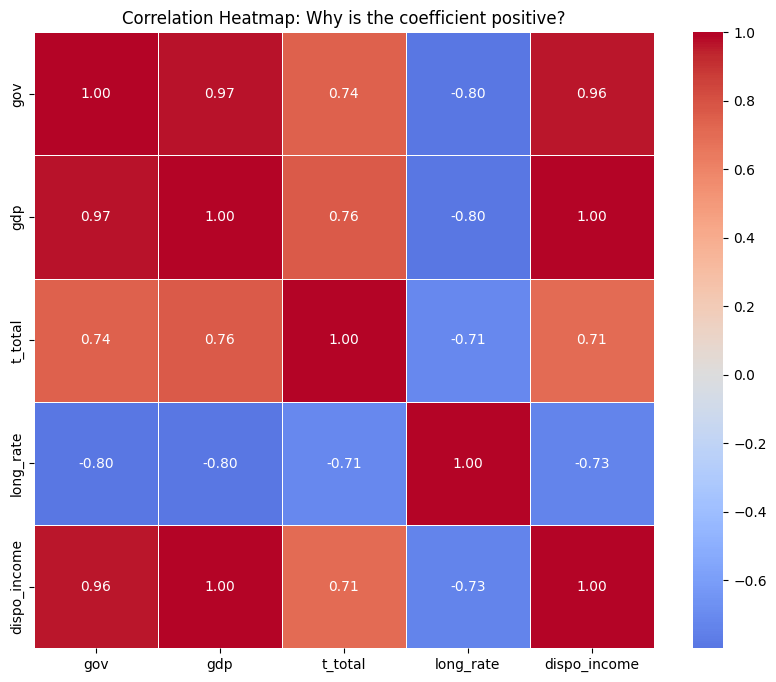

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 見たい変数だけを選抜
# 全部やると文字が小さくなるので、投資関数に関係ありそうなものをピックアップします
target_cols = [
    'gov',          # 消費 (主役)
    'gdp',          
    't_total',    # 一般会計税収
    'long_rate',      # デフレーター (物価)
    'dispo_income'           # 政府支出 (参考)
]

# 2. 相関行列の計算
corr_matrix = d[target_cols].corr()

# 3. ヒートマップの描画
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,       # 数字を表示する
            cmap='coolwarm',  # 赤がプラス、青がマイナス
            center=0,         # 0を白にする
            fmt='.2f',        # 小数点2桁まで
            linewidths=0.5)

plt.title("Correlation Heatmap: Why is the coefficient positive?")
plt.show()

In [47]:
# 純粋に回帰分析、
# 過去の税収と金利、そしてラグに影響があるかを見てみる
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

# --- サンプルデータの準備（実際にはあなたのデータフレームを使用してください） ---
# df に 'gov', 't_total', 'long_rate' が含まれていると仮定
# T = 183
# df['gov'] = ...
# df['t_total'] = ...
# df['long_rate'] = ...
# --------------------------------------------------------------------------------
df = d.copy()
# 1. ラグ変数を作成
# 前期の総税収 (t_total) と長期金利 (long_rate) を使用
df['t_total_L1'] = df['t_total'].shift(1)
df['long_rate_L1'] = df['long_rate'].shift(1)
df['gov_L1'] = df['gov'].shift(1)

# 2. 欠損値を除去
df_g_clean_new = df.dropna(subset=['gov', 't_total_L1', 'long_rate_L1', 'gov_L1'])

# 3. OLSモデルの推定
# モデル: G_t = λ0 + λ1 * T_total_{t-1} + λ2 * long_rate_{t-1} + λ3 * G_{t-1} + error
formula_g_new = 'gov ~ t_total_L1 + long_rate_L1 + gov_L1'
ols_model_g_new = ols(formula_g_new, data=df_g_clean_new).fit()

# 4. 結果の表示
print("\n--- 政府支出関数 (G) 動学的OLS 再推定結果 ---")
print(ols_model_g_new.summary())


--- 政府支出関数 (G) 動学的OLS 再推定結果 ---
                            OLS Regression Results                            
Dep. Variable:                    gov   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     6678.
Date:                Sun, 28 Dec 2025   Prob (F-statistic):          1.48e-158
Time:                        20:38:45   Log-Likelihood:                -1305.6
No. Observations:                 153   AIC:                             2619.
Df Residuals:                     149   BIC:                             2631.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2

In [48]:
# 非定常の確認
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# --- ADF検定の実行 ---
def run_adf_test(series, name):
    """ADF検定を実行する関数"""
    result = adfuller(series.dropna())
    print(f"--- ADF Test for: {name} ---")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"P-Value: {result[1]:.4f}")
    if result[1] < 0.05:
        print("Conclusion: P-Value < 0.05. -> SERIES IS LIKELY STATIONARY.")
    else:
        print("Conclusion: P-Value >= 0.05. -> SERIES IS LIKELY NON-STATIONARY (Unit Root).")
    print("-" * 30)

# =======================================================
# Step A: 単位根検定 (GとT_totalの定常性の確認)
# =======================================================
print("### 1. 政府支出関数 (G) 単位根検定の結果 ###")
# df に 'gov', 't_total', 'long_rate' が含まれていると仮定します
# 実際のデータフレーム名とカラム名を使用してください
run_adf_test(df['gov'], 'gov (Government Expenditure)')
run_adf_test(df['t_total'], 't_total (Total Tax Revenue)')
run_adf_test(df['long_rate'], 'long_rate (Long-Term Rate)')

### 1. 政府支出関数 (G) 単位根検定の結果 ###
--- ADF Test for: gov (Government Expenditure) ---
ADF Statistic: -1.9891
P-Value: 0.2914
Conclusion: P-Value >= 0.05. -> SERIES IS LIKELY NON-STATIONARY (Unit Root).
------------------------------
--- ADF Test for: t_total (Total Tax Revenue) ---
ADF Statistic: -1.2833
P-Value: 0.6368
Conclusion: P-Value >= 0.05. -> SERIES IS LIKELY NON-STATIONARY (Unit Root).
------------------------------
--- ADF Test for: long_rate (Long-Term Rate) ---
ADF Statistic: -0.5979
P-Value: 0.8715
Conclusion: P-Value >= 0.05. -> SERIES IS LIKELY NON-STATIONARY (Unit Root).
------------------------------


In [49]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

def run_gov_ecm_analysis(df_input):
    print("=== 政府支出関数 (G) ECM 推定プロセス ===\n")
    
    # データをコピー
    df = df_input.copy()
    df["lag_t"] = df["t_total"].shift(1)
    # 欠損値除去（G, T_total, long_rate に基づく）
    df = df.dropna(subset=['gov', "t_total", "lag_t", 'long_rate'])

    # =================================================================
    # 【Step 0】 単位根検定 (前提確認) - 結果は既に確認済み
    # =================================================================
    print("--- [Step 0] 単位根検定 ---")
    print("gov, t_total, long_rate は全て非定常（I(1)）と仮定して進めます。")
    print("---------------------------------")


    # =================================================================
    # 【Step 1】 長期均衡式の推定 (Cointegration Regression)
    # モデル: G_t = λ0 + λ1*T_total_t + λ2*long_rate_t + μ_t
    # =================================================================
    print("--- [Step 1] 長期均衡式の推定 (水準OLS) ---")
    
    y_long_g = df['gov']
    X_long_g = df[["lag_t", 'long_rate', "t_total"]] # 長期金利を資金調達コストとして投入
    X_long_g = sm.add_constant(X_long_g)
    
    model_long_g = sm.OLS(y_long_g, X_long_g)
    results_long_g = model_long_g.fit()
    
    print(results_long_g.summary().tables[1])
    
    # ★重要: 残差 (μ_t) を保存する (ECM項のベース)
    df['ecm_term_g'] = results_long_g.resid

    # =================================================================
    # 【Step 2】 共和分検定 (残差の定常性チェック)
    # =================================================================
    print("\n--- [Step 2] 残差のADF検定 (共和分の確認) ---")
    adf_resid_g = adfuller(df['ecm_term_g'])
    p_val_resid_g = adf_resid_g[1]
    
    print(f"残差のADF統計量: {adf_resid_g[0]:.4f}")
    print(f"p値: {p_val_resid_g:.4f}")
    
    if p_val_resid_g < 0.1: # 10%有意水準で判定
        print("✅ 成功: 残差は定常です。ECM推定に進めます。")
    else:
        print("⚠️ 警告: 残差が非定常です。共和分関係は成立していません。")
        return # 成立しなければ短期モデルの推定は控える

    # =================================================================
    # 【Step 3】 短期動学モデルの推定 (Error Correction Model)
    # モデル: ΔG_t = γ0 + γ1*ΔT_total_t + γ2*Δr_t + δ*ECM_{t-1} + γ3*ΔG_{t-1}
    # =================================================================
    print("\n--- [Step 3] 短期モデルの推定 (差分+ECM項) ---")
    
    # 差分データの作成
    df['d_gov'] = df['gov'].diff()
    df['d_lag_t'] = df['lag_t'].diff()
    df['d_long_rate'] = df['long_rate'].diff()
    df["d_t_total"] = df["t_total"].diff()
    
    # ラグ変数 (短期動学項とECM項) の作成
    df['d_gov_lag1'] = df['d_gov'].shift(1) # Gの慣性効果
    df['ecm_lag1_g'] = df['ecm_term_g'].shift(1) # 前期の乖離
    
    # 分析用データの整形
    df_short_g = df.dropna(subset=['d_gov', "d_lag_t", "d_t_total", 'd_long_rate', 'd_gov_lag1', 'ecm_lag1_g'])
    
    y_short_g = df_short_g['d_gov']
    # 説明変数: ΔT_total, Δlong_rate, ECMラグ, ΔGラグ
    X_short_g = df_short_g[["d_t_total", "lag_t", 'd_long_rate', 'ecm_lag1_g', 'd_gov_lag1',]]
    X_short_g = sm.add_constant(X_short_g)
    
    model_short_g = sm.OLS(y_short_g, X_short_g)
    results_short_g = model_short_g.fit()
    
    print(results_short_g.summary())
    
    # =================================================================
    # 結果の解釈
    # =================================================================
    delta_g = results_short_g.params['ecm_lag1_g']
    print(f"\n★ 修正係数 (δ): {delta_g:.4f}")
    
    if delta_g < 0 and results_short_g.pvalues['ecm_lag1_g'] < 0.05:
        print("✅ 理想的です: 負で有意な修正項が得られました。長期的な財政制約が働いています！")
    elif delta_g < 0:
        print("⚠️ 惜しい: 負ですが有意ではありません。調整力が弱いです。")
    else:
        print("❌ 失敗: 係数がプラスです。発散してしまいます。")

# 実行
run_gov_ecm_analysis(d)

=== 政府支出関数 (G) ECM 推定プロセス ===

--- [Step 0] 単位根検定 ---
gov, t_total, long_rate は全て非定常（I(1)）と仮定して進めます。
---------------------------------
--- [Step 1] 長期均衡式の推定 (水準OLS) ---
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.449e+05   7305.561     19.834      0.000     1.3e+05    1.59e+05
lag_t         -0.4257      0.477     -0.893      0.373      -1.368       0.516
long_rate  -5785.8104    488.798    -11.837      0.000   -6751.682   -4819.939
t_total        0.2397      0.462      0.519      0.605      -0.673       1.153

--- [Step 2] 残差のADF検定 (共和分の確認) ---
残差のADF統計量: -3.1843
p値: 0.0209
✅ 成功: 残差は定常です。ECM推定に進めます。

--- [Step 3] 短期モデルの推定 (差分+ECM項) ---
                            OLS Regression Results                            
Dep. Variable:                  d_gov   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:               

In [50]:
# 長期ではrのみ、短期ではTも入れる
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

def run_gov_ecm_analysis(df_input):
    print("=== 政府支出関数 (G) ECM 推定プロセス ===\n")
    
    # データをコピー
    df = df_input.copy()
    df["lag_t"] = df["t_total"].shift(1)
    # 欠損値除去（G, T_total, long_rate に基づく）
    df = df.dropna(subset=['gov', "t_total", "lag_t", 'long_rate'])

    # =================================================================
    # 【Step 0】 単位根検定 (前提確認) - 結果は既に確認済み
    # =================================================================
    print("--- [Step 0] 単位根検定 ---")
    print("gov, t_total, long_rate は全て非定常（I(1)）と仮定して進めます。")
    print("---------------------------------")


    # =================================================================
    # 【Step 1】 長期均衡式の推定 (Cointegration Regression)
    # モデル: G_t = λ0 + λ1*T_total_t + λ2*long_rate_t + μ_t
    # =================================================================
    print("--- [Step 1] 長期均衡式の推定 (水準OLS) ---")
    
    y_long_g = df['gov']
    X_long_g = df[['long_rate']] # 長期金利を資金調達コストとして投入
    X_long_g = sm.add_constant(X_long_g)
    
    model_long_g = sm.OLS(y_long_g, X_long_g)
    results_long_g = model_long_g.fit()
    
    print(results_long_g.summary().tables[1])
    
    # ★重要: 残差 (μ_t) を保存する (ECM項のベース)
    df['ecm_term_g'] = results_long_g.resid

    # =================================================================
    # 【Step 2】 共和分検定 (残差の定常性チェック)
    # =================================================================
    print("\n--- [Step 2] 残差のADF検定 (共和分の確認) ---")
    adf_resid_g = adfuller(df['ecm_term_g'])
    p_val_resid_g = adf_resid_g[1]
    
    print(f"残差のADF統計量: {adf_resid_g[0]:.4f}")
    print(f"p値: {p_val_resid_g:.4f}")
    
    if p_val_resid_g < 0.1: # 10%有意水準で判定
        print("✅ 成功: 残差は定常です。ECM推定に進めます。")
    else:
        print("⚠️ 警告: 残差が非定常です。共和分関係は成立していません。")
        return # 成立しなければ短期モデルの推定は控える

    # =================================================================
    # 【Step 3】 短期動学モデルの推定 (Error Correction Model)
    # モデル: ΔG_t = γ0 + γ1*ΔT_total_t + γ2*Δr_t + δ*ECM_{t-1} + γ3*ΔG_{t-1}
    # =================================================================
    print("\n--- [Step 3] 短期モデルの推定 (差分+ECM項) ---")
    
    # 差分データの作成
    df['d_gov'] = df['gov'].diff()
    df['d_lag_t'] = df['lag_t'].diff()
    df['d_long_rate'] = df['long_rate'].diff()
    df["d_t_total"] = df["t_total"].diff()
    
    # ラグ変数 (短期動学項とECM項) の作成
    df['d_gov_lag1'] = df['d_gov'].shift(1) # Gの慣性効果
    df['ecm_lag1_g'] = df['ecm_term_g'].shift(1) # 前期の乖離
    
    # 分析用データの整形
    df_short_g = df.dropna(subset=['d_gov', "d_lag_t", "d_t_total", 'd_long_rate', 'd_gov_lag1', 'ecm_lag1_g'])
    
    y_short_g = df_short_g['d_gov']
    # 説明変数: ΔT_total, Δlong_rate, ECMラグ, ΔGラグ
    X_short_g = df_short_g[['d_long_rate', 'ecm_lag1_g', 'd_gov_lag1']]
    X_short_g = sm.add_constant(X_short_g)
    
    model_short_g = sm.OLS(y_short_g, X_short_g)
    results_short_g = model_short_g.fit()
    
    print(results_short_g.summary())
    
    # =================================================================
    # 結果の解釈
    # =================================================================
    delta_g = results_short_g.params['ecm_lag1_g']
    print(f"\n★ 修正係数 (δ): {delta_g:.4f}")
    
    if delta_g < 0 and results_short_g.pvalues['ecm_lag1_g'] < 0.05:
        print("✅ 理想的です: 負で有意な修正項が得られました。長期的な財政制約が働いています！")
    elif delta_g < 0:
        print("⚠️ 惜しい: 負ですが有意ではありません。調整力が弱いです。")
    else:
        print("❌ 失敗: 係数がプラスです。発散してしまいます。")

# 実行
run_gov_ecm_analysis(d)

=== 政府支出関数 (G) ECM 推定プロセス ===

--- [Step 0] 単位根検定 ---
gov, t_total, long_rate は全て非定常（I(1)）と仮定して進めます。
---------------------------------
--- [Step 1] 長期均衡式の推定 (水準OLS) ---
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.345e+05    950.857    141.427      0.000    1.33e+05    1.36e+05
long_rate  -5269.1769    336.905    -15.640      0.000   -5934.834   -4603.520

--- [Step 2] 残差のADF検定 (共和分の確認) ---
残差のADF統計量: -2.6140
p値: 0.0901
✅ 成功: 残差は定常です。ECM推定に進めます。

--- [Step 3] 短期モデルの推定 (差分+ECM項) ---
                            OLS Regression Results                            
Dep. Variable:                  d_gov   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     4.462
Date:                Sun, 28 Dec 2025   Prob (F-statistic):           

# モデル案の整理
- 

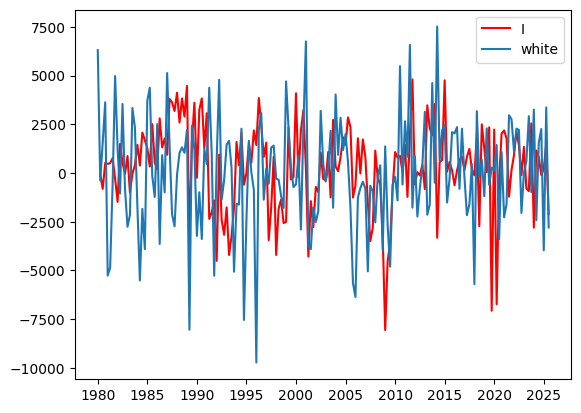

In [51]:
#plt.plot(d.index, d["cons"].diff(), label="C", color="yellow")
plt.plot(d.index, d["inv"].diff(), label="I", color="red")
#plt.plot(d.index, d["gov"].diff(), label="G", color="green")
#plt.plot(d.index, d["gdp"].diff(), label="Y", color="black")
import random
plt.plot(d.index, [random.gauss(0, 3000) for i in d.index], label="white")

plt.legend()

In [52]:
y = np.log(d["inv"]).iloc[27:]
x = np.log(d["inv"].diff(1)).shift(1).iloc[27:]
#r = d["long_rate"].diff(1).iloc[27:]



import pandas as pd
import statsmodels.formula.api as smf

df = pd.concat([y, x, r], axis=1)

model = smf.ols('y ~ x', data=df).fit()
print(model.summary())


/home/shouyanyonga/good_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


NameError: name 'r' is not defined